### Fetch News Articles using NewsAPI
This script fetches recent articles containing a specific keyword, such as `technology`.

In [1]:
import configparser
import requests
import pandas as pd

# Read API key from config.ini
config = configparser.ConfigParser()
config.read('config.ini')
API_KEY = config.get('newsapi', 'api_key')

# Define the query and fetch news articles
query = "technology"
url = f"https://newsapi.org/v2/everything?q={query}&language=en&apiKey={API_KEY}"

response = requests.get(url)
data = response.json()

# Extract articles and store in a DataFrame
articles = data.get('articles', [])
df = pd.DataFrame(articles)

# Print the titles of the articles
print("Sample News Titles:")
print(df['title'].head())

Sample News Titles:
0    U.S. Proposes Ban on Connected Car Technology ...
1    Everything We Know About Lebanon’s Exploding P...
2         Gizmodo Science Fair: A Quiet Supersonic Jet
3    First Vacuum in Space: Where Roborock’s Vision...
4    From Dust to the Stars: Roborock’s Vacuum Jour...
Name: title, dtype: object


### Clean the News Data
Clean the article text by removing stop words, punctuation, and performing tokenization.

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Set of stop words for filtering
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Filter out stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ratch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ratch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Apply LDA for Topic Modeling
Use the gensim library to perform LDA topic modeling.

In [3]:
import pandas as pd

def fetch_and_clean_news(query='technology'):
    # Fetch news articles
    url = f"https://newsapi.org/v2/everything?q={query}&language=en&apiKey={API_KEY}"
    response = requests.get(url)
    data = response.json()
    articles = data.get('articles', [])
    
    # Store the articles in a DataFrame
    df = pd.DataFrame(articles)
    
    # Clean the descriptions
    df['cleaned_description'] = df['description'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')
    
    return df

# Example: Fetch and clean articles related to "technology"
df = fetch_and_clean_news('technology')
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,cleaned_description
0,"{'id': None, 'name': 'Gizmodo.com'}",Todd Feathers,U.S. Proposes Ban on Connected Car Technology ...,The Commerce Department said hardware and soft...,https://gizmodo.com/u-s-proposes-ban-on-connec...,https://gizmodo.com/app/uploads/2024/09/china-...,2024-09-23T14:17:48Z,The U.S. plans to prohibit the use of Chinese ...,commerce department said hardware software com...
1,"{'id': None, 'name': 'Gizmodo.com'}",Matthew Gault,Everything We Know About Lebanon’s Exploding P...,The old technology is used because it's more d...,https://gizmodo.com/everything-we-know-about-l...,https://gizmodo.com/app/uploads/2024/09/GoldAp...,2024-09-18T15:45:17Z,Yesterday pagers exploded across Lebanon as pa...,old technology used durable reliable thought s...
2,"{'id': None, 'name': 'Gizmodo.com'}",Isaac Schultz,Gizmodo Science Fair: A Quiet Supersonic Jet,NASA's Quesst mission seeks to validate a quie...,https://gizmodo.com/science-fair-nasa-quesst-x...,https://gizmodo.com/app/uploads/2024/09/X-59-j...,2024-09-24T12:00:42Z,NASAs Quesst team is a winner of the 2024 Gizm...,nasas quesst mission seeks validate quiet supe...
3,"{'id': None, 'name': 'Gizmodo.com'}",Gizmodo,First Vacuum in Space: Where Roborock’s Vision...,Sending a vacuum into space not only showcases...,https://gizmodo.com/first-vacuum-in-space-wher...,https://gizmodo.com/app/uploads/2024/10/roboro...,2024-10-11T14:20:52Z,Roborock is a pioneer and global leader in sma...,sending vacuum space showcases roborocks innov...
4,"{'id': None, 'name': 'Gizmodo.com'}",Gizmodo,From Dust to the Stars: Roborock’s Vacuum Jour...,Roborock's recent launch of the S8 MaxV Ultra ...,https://gizmodo.com/from-dust-to-the-stars-rob...,https://gizmodo.com/app/uploads/2024/09/roboro...,2024-10-02T13:36:36Z,Roborock is a global leader in smart home robo...,roborocks recent launch maxv ultra vacuum near...


### Visualize Topics using Word Cloud
Generate a word cloud based on the LDA topics.

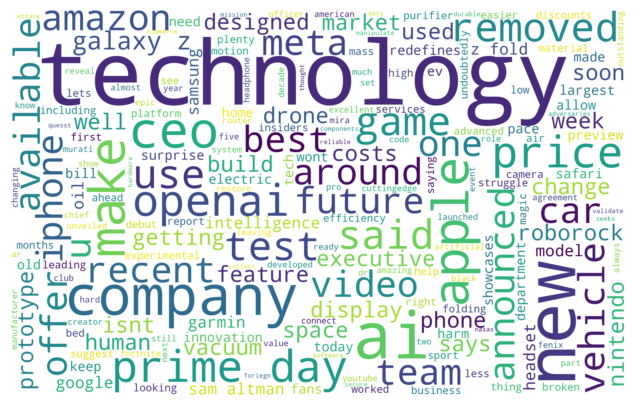

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def generate_word_cloud(text):
    # Generate a word cloud image
    wordcloud = WordCloud(width=2560, height=1600, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Save the image to a BytesIO object
    image_stream = BytesIO()
    wordcloud.to_image().save(image_stream, format='PNG')
    return base64.b64encode(image_stream.getvalue()).decode()

# Combine all cleaned descriptions into a single string
combined_text = ' '.join(df['cleaned_description'])
# Generate and display the word cloud
word_cloud_image = generate_word_cloud(combined_text)

### Create a Clickable Word Cloud (Optional, Advanced)
To create an interactive visualization where clicking a word shows related articles, you’ll need to use a web framework like **Flask** or **Dash**. Here’s a basic outline:

1. Use Dash or Flask to create a web server.
2. Display the word cloud as an image.
3. Use JavaScript or Dash callbacks to capture word clicks.
4. Display related articles based on the clicked word.

In [5]:
# Store cleaned data into a file (optional)
df.to_csv('cleaned_news_data.csv', index = False)

In [6]:
import plotly.express as px

# Create a word cloud using Plotly (simpler for Jupyter)
def plot_word_cloud_plotly(text):
    wordcloud = WordCloud(width=2560, height=1600, background_color='white').generate(text)
    word_freq = wordcloud.words_
    
    # Convert word frequencies to a DataFrame
    words_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
    
    # Create a scatter plot representing the word cloud
    fig = px.scatter(
        words_df,
        x='word', 
        y='frequency', 
        size='frequency', 
        text='word', 
        title='Word Cloud',
        hover_name='word',
        size_max=60
    )
    fig.update_traces(textposition='top center', marker=dict(color='skyblue', opacity=0.6))
    fig.show()

# Display the interactive word cloud
plot_word_cloud_plotly(combined_text)

### Visualize Word Frequencies with a Bar Chart

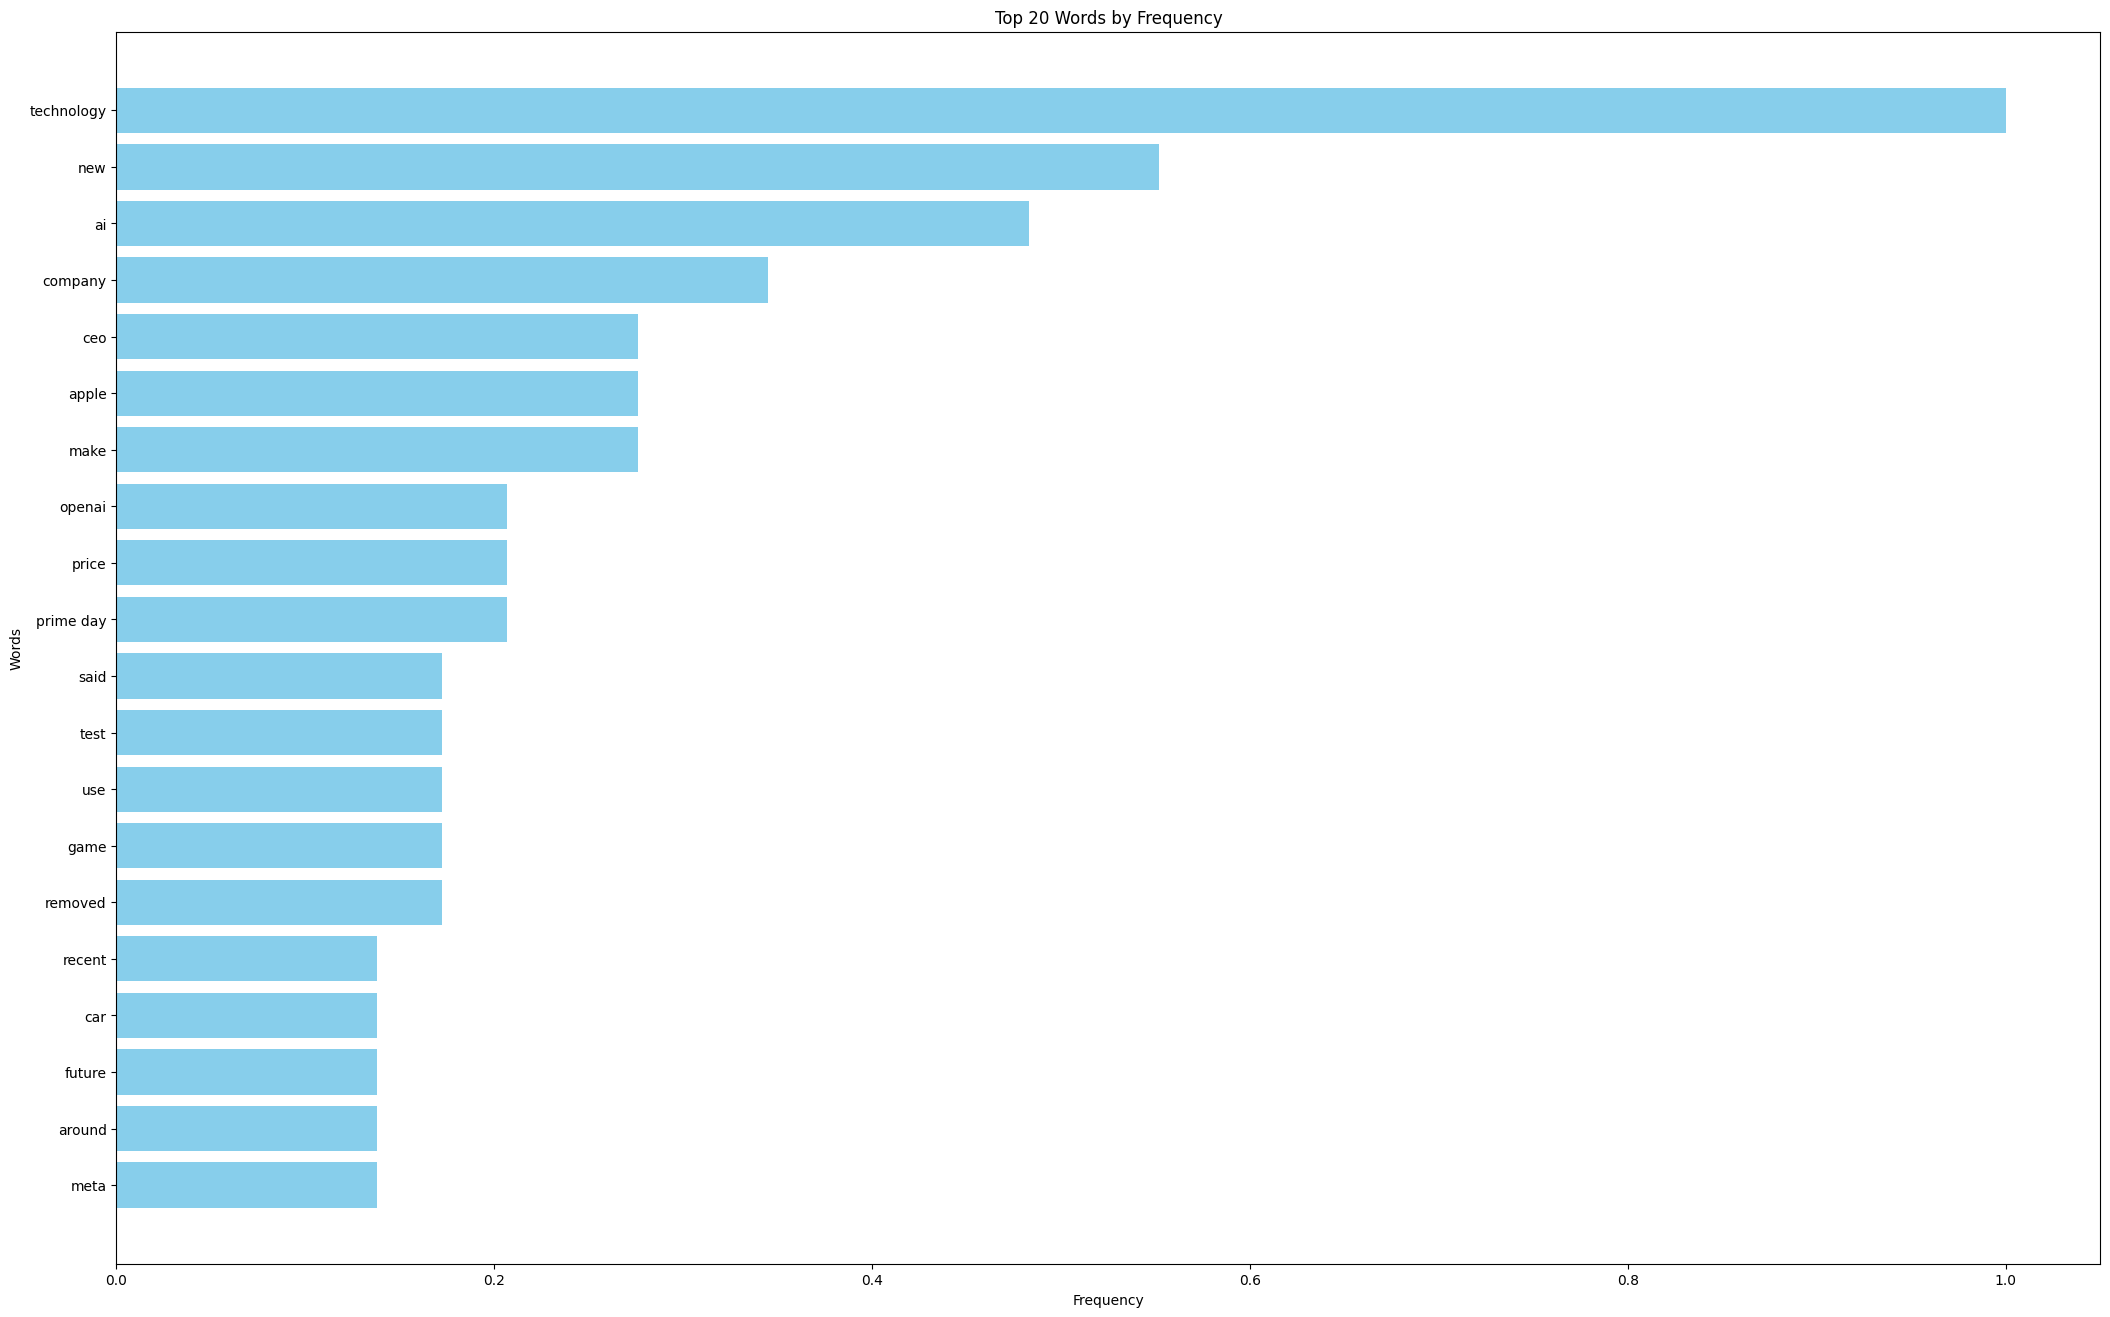

In [7]:
import matplotlib.pyplot as plt

def plot_word_frequencies_bar_chart(text):
    # Generate the word cloud to extract word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    word_freq = wordcloud.words_
    
    # Convert word frequencies to a sorted list
    word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
    words, frequencies = zip(*word_freq_sorted)
    
    # Create a bar chart of word frequencies
    plt.figure(figsize=(25.6, 16))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 20 Words by Frequency')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Display the bar chart
plot_word_frequencies_bar_chart(combined_text)

### Distribution of Article Sources

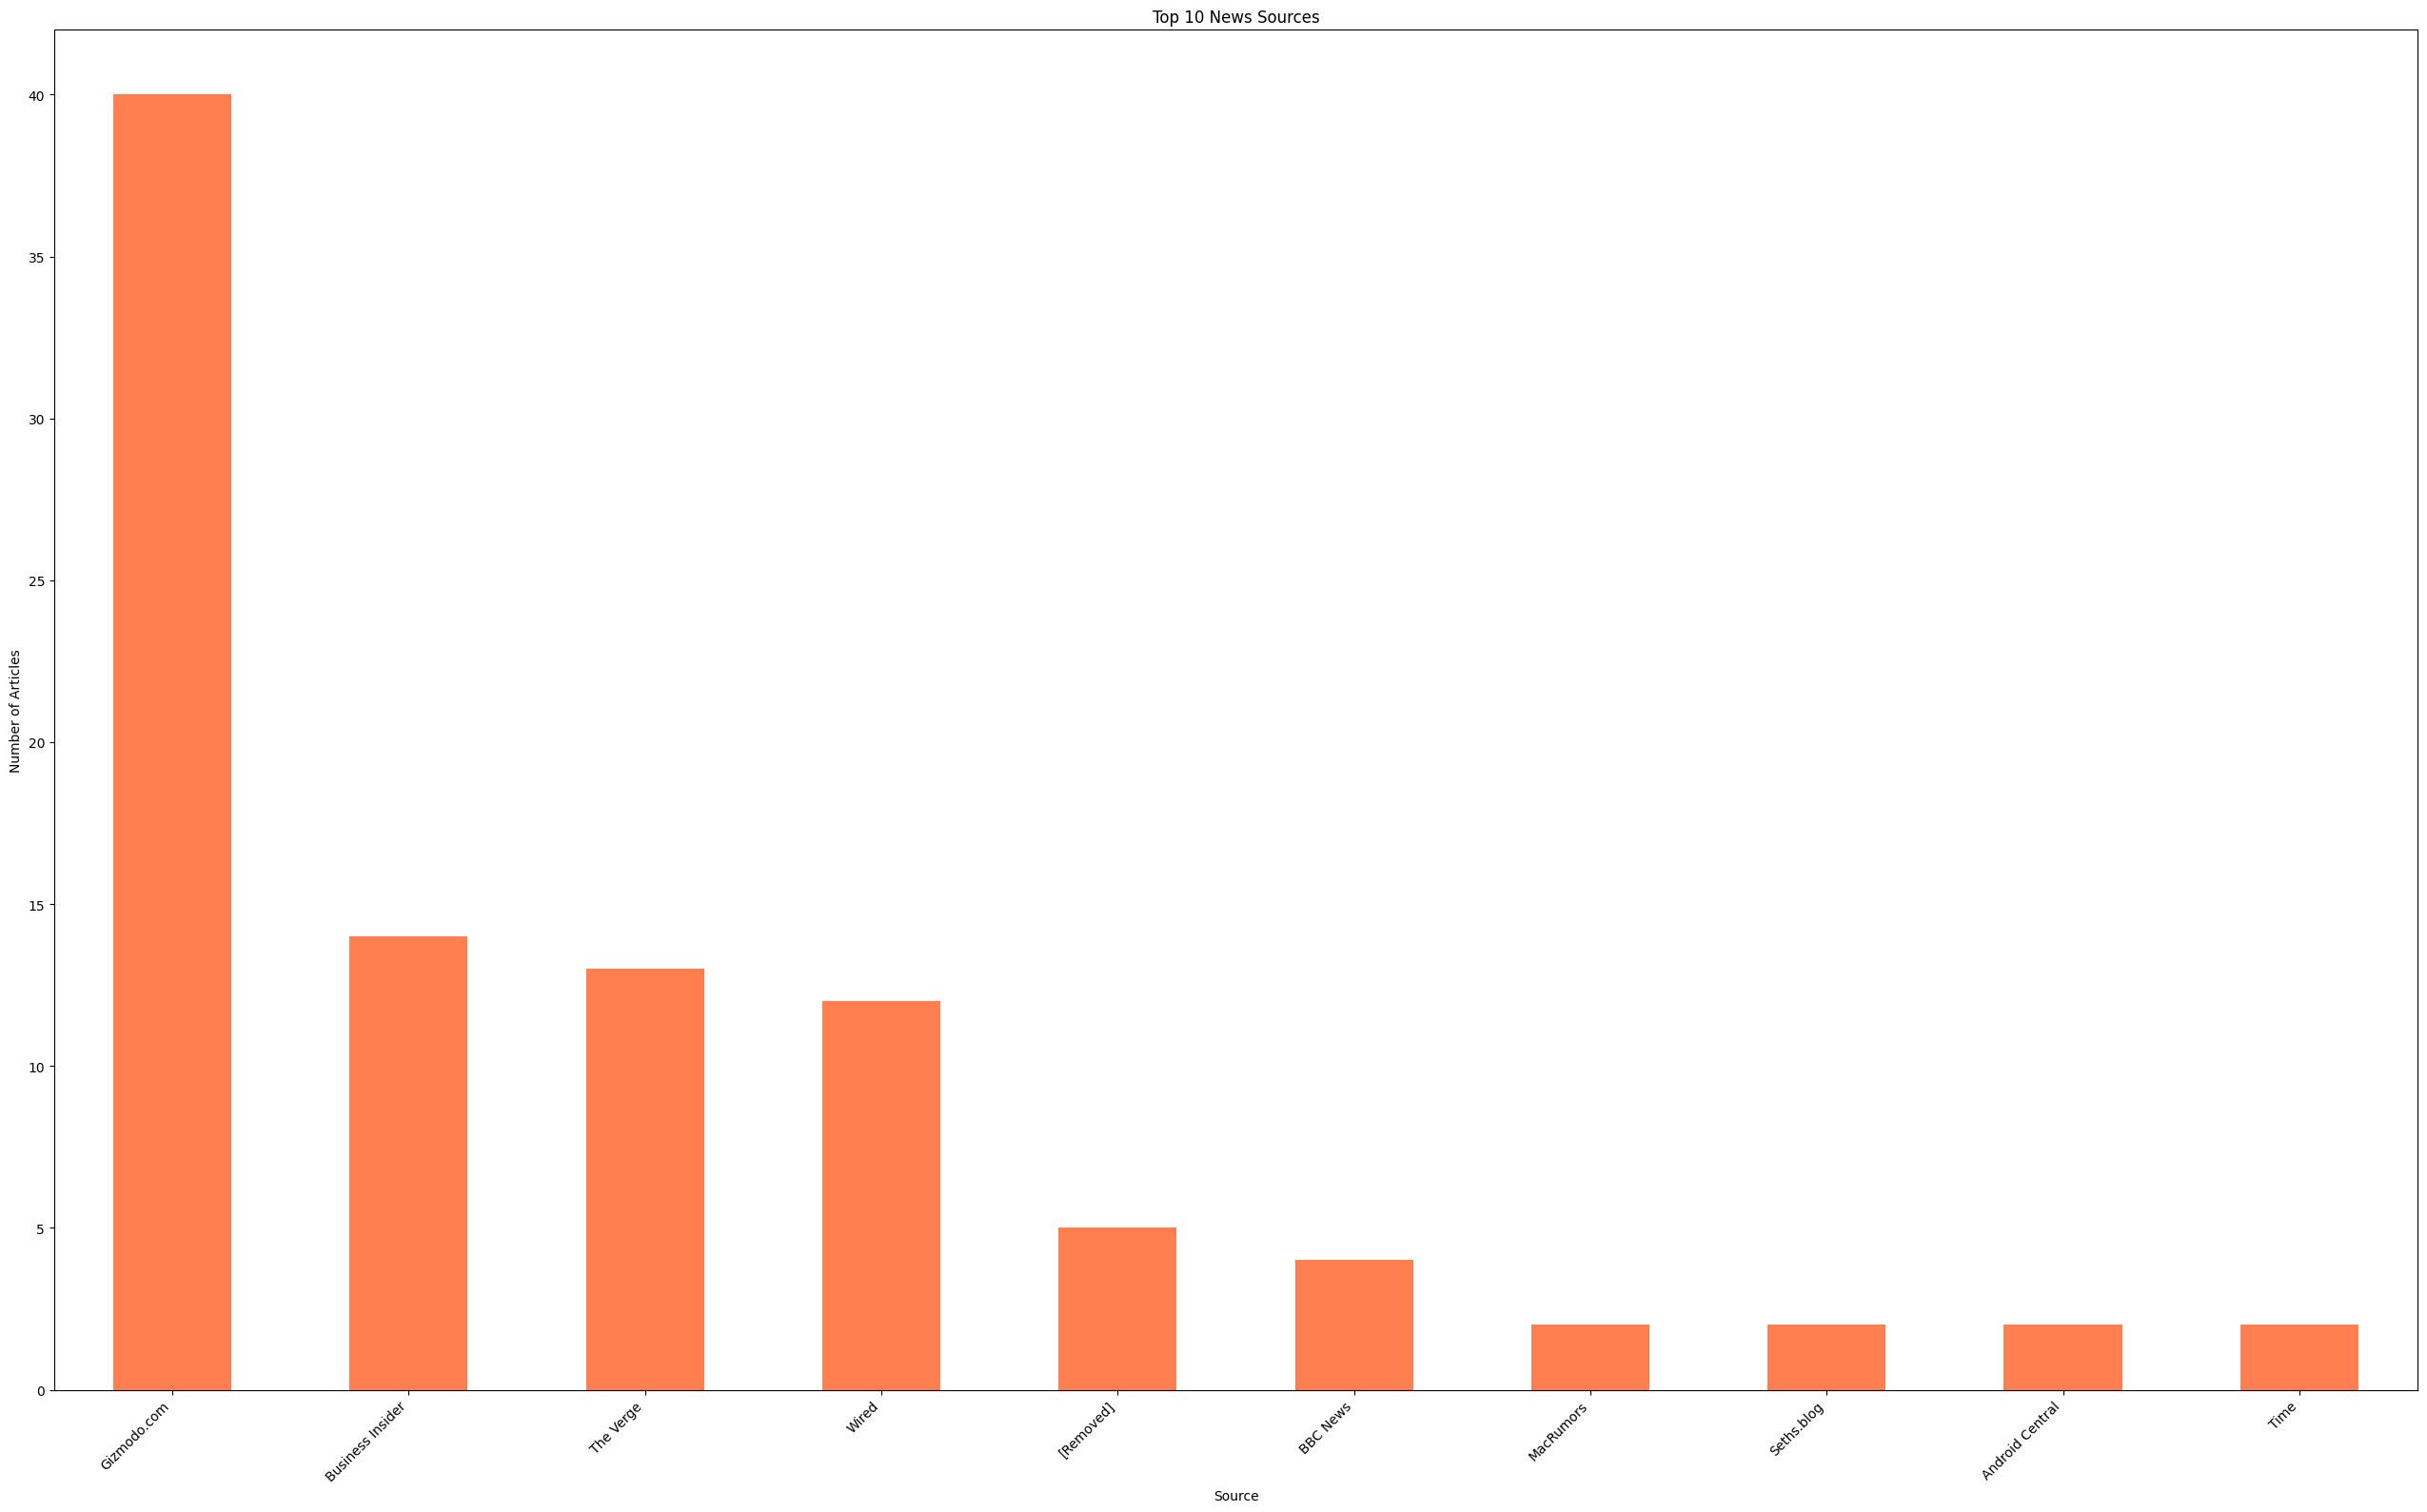

In [8]:
def plot_article_sources_distribution(df):
    # Count the occurrences of each source
    source_counts = df['source'].apply(lambda x: x['name'] if isinstance(x, dict) else x).value_counts().head(10)
    
    # Create a bar chart of the top 10 sources
    plt.figure(figsize=(25.6, 16))
    source_counts.plot(kind='bar', color='coral')
    plt.title('Top 10 News Sources')
    plt.xlabel('Source')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Display the article sources distribution
plot_article_sources_distribution(df)

### Sentiment Analysis of Articles

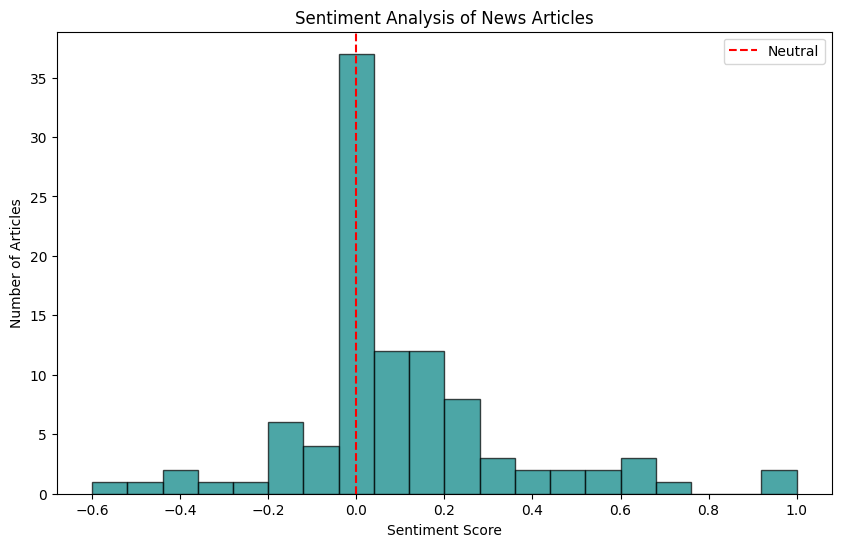

In [9]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Calculate polarity using TextBlob (-1 to 1 scale)
    blob = TextBlob(text)
    return blob.sentiment.polarity

def plot_sentiment_distribution(df):
    # Apply sentiment analysis to each cleaned description
    df['sentiment'] = df['cleaned_description'].apply(analyze_sentiment)
    
    # Create a histogram of the sentiment scores
    plt.figure(figsize=(10, 6))
    plt.hist(df['sentiment'], bins=20, color='teal', edgecolor='black', alpha=0.7)
    plt.title('Sentiment Analysis of News Articles')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Number of Articles')
    plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
    plt.legend()
    plt.show()

# Display the sentiment distribution
plot_sentiment_distribution(df)

### Vectorize the Text Data and Fit LDA Model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
text_vectorized = vectorizer.fit_transform(df['cleaned_description'])

# Define the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='batch', max_iter=10)
lda_model.fit(text_vectorized)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", end="")
        print(" + ".join([f"{feature_names[i]}: {round(topic[i], 3)}" for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words for each topic
display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topic 1: oil: 2.1 + costs: 2.1 + router: 2.1 + google: 2.1 + amazing: 2.1 + technology: 2.1 + team: 1.1 + getting: 1.1 + games: 1.1 + game: 1.1
Topic 2: removed: 5.1 + technology: 4.1 + used: 2.1 + ai: 2.1 + hard: 2.1 + dr: 2.1 + looking: 1.1 + value: 1.1 + connect: 1.1 + ar: 1.1
Topic 3: iphone: 3.1 + says: 2.1 + apple: 2.1 + restore: 2.1 + broken: 2.1 + technology: 2.1 + pro: 1.1 + old: 1.1 + vehicles: 1.1 + agreement: 1.1
Topic 4: ceo: 4.1 + technology: 4.1 + new: 3.1 + test: 2.1 + week: 2.1 + wont: 2.1 + ahead: 2.1 + altman: 2.1 + car: 2.1 + services: 2.1
Topic 5: apple: 6.1 + technology: 4.1 + garmin: 3.1 + recent: 2.1 + fenix: 2.1 + safari: 2.1 + preview: 2.1 + help: 2.1 + discounts: 2.1 + ai: 2.1
Topic 6: new: 5.1 + company: 3.1 + make: 3.1 + technology: 3.1 + day: 2.1 + announced: 2.1 + mass: 2.1 + report: 2.1 + black: 2.1 + suggest: 2.1
Topic 7: ai: 2.1 + price: 1.1 + prime: 1.1 + day: 1.1 + offer: 1.1 + artificial: 1.1 + openai: 1.1 + make: 1.1 + video: 1.1 + meta: 1.1
Topic 

### Most Common Words in Each Topic

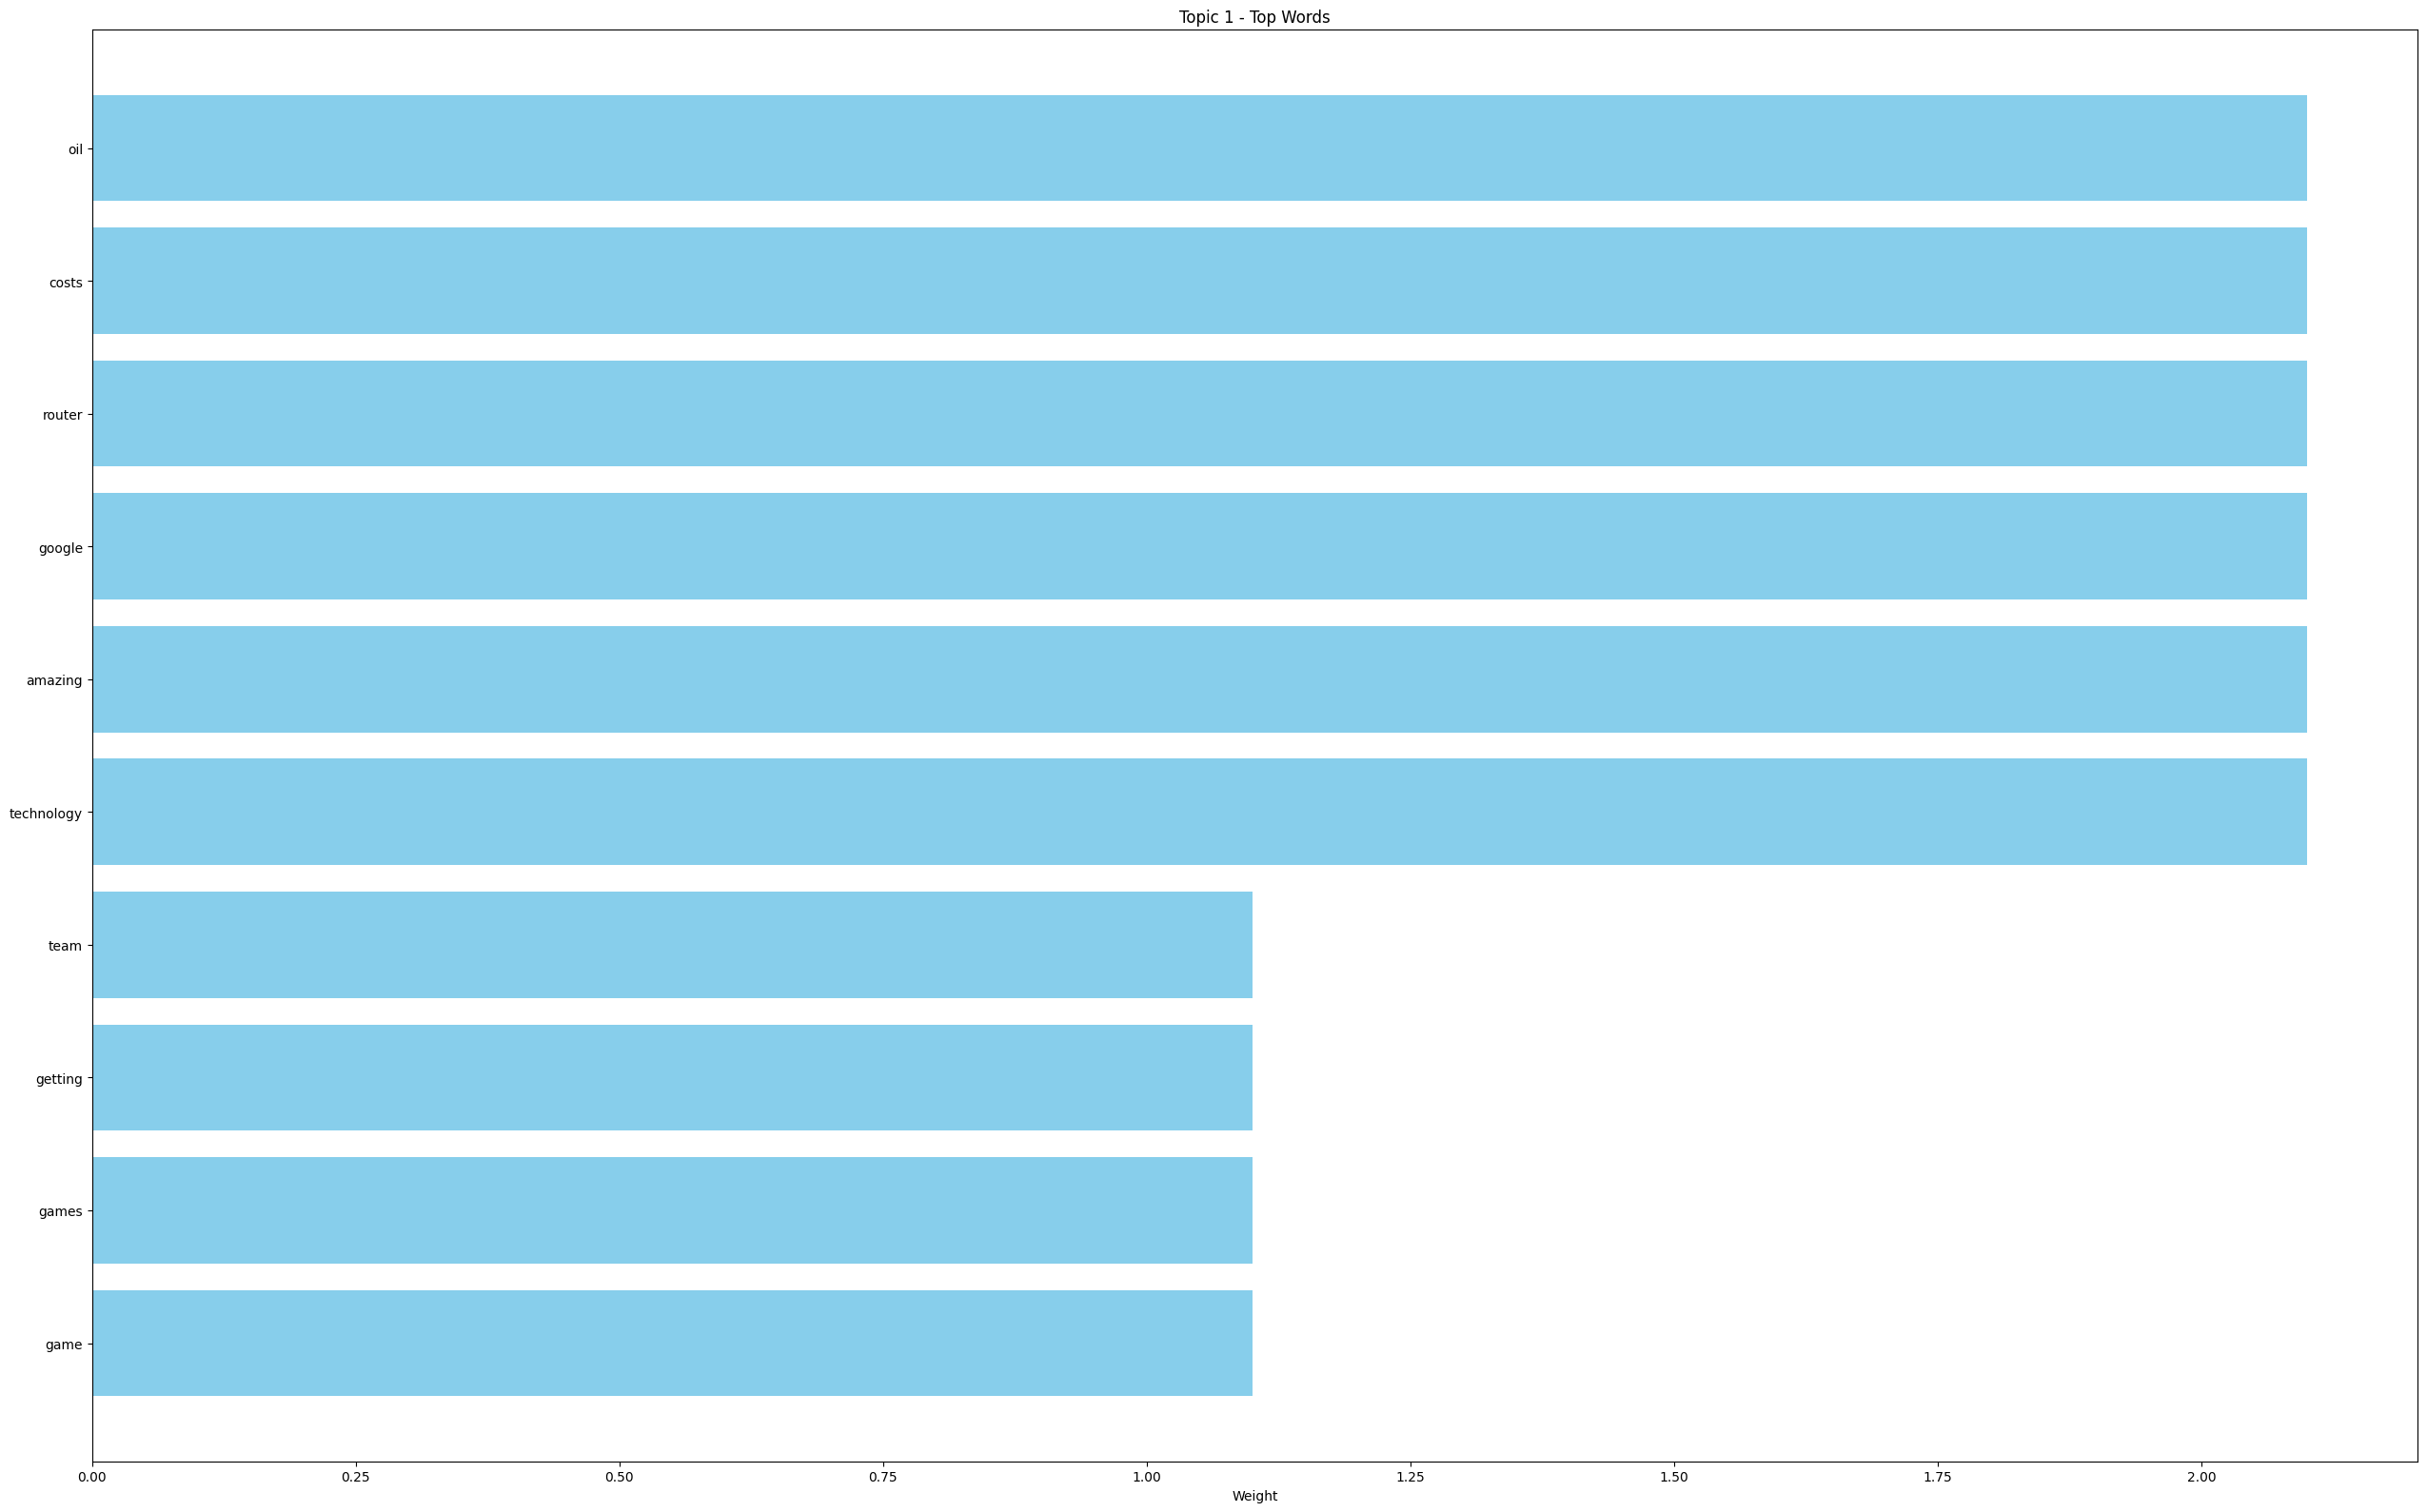

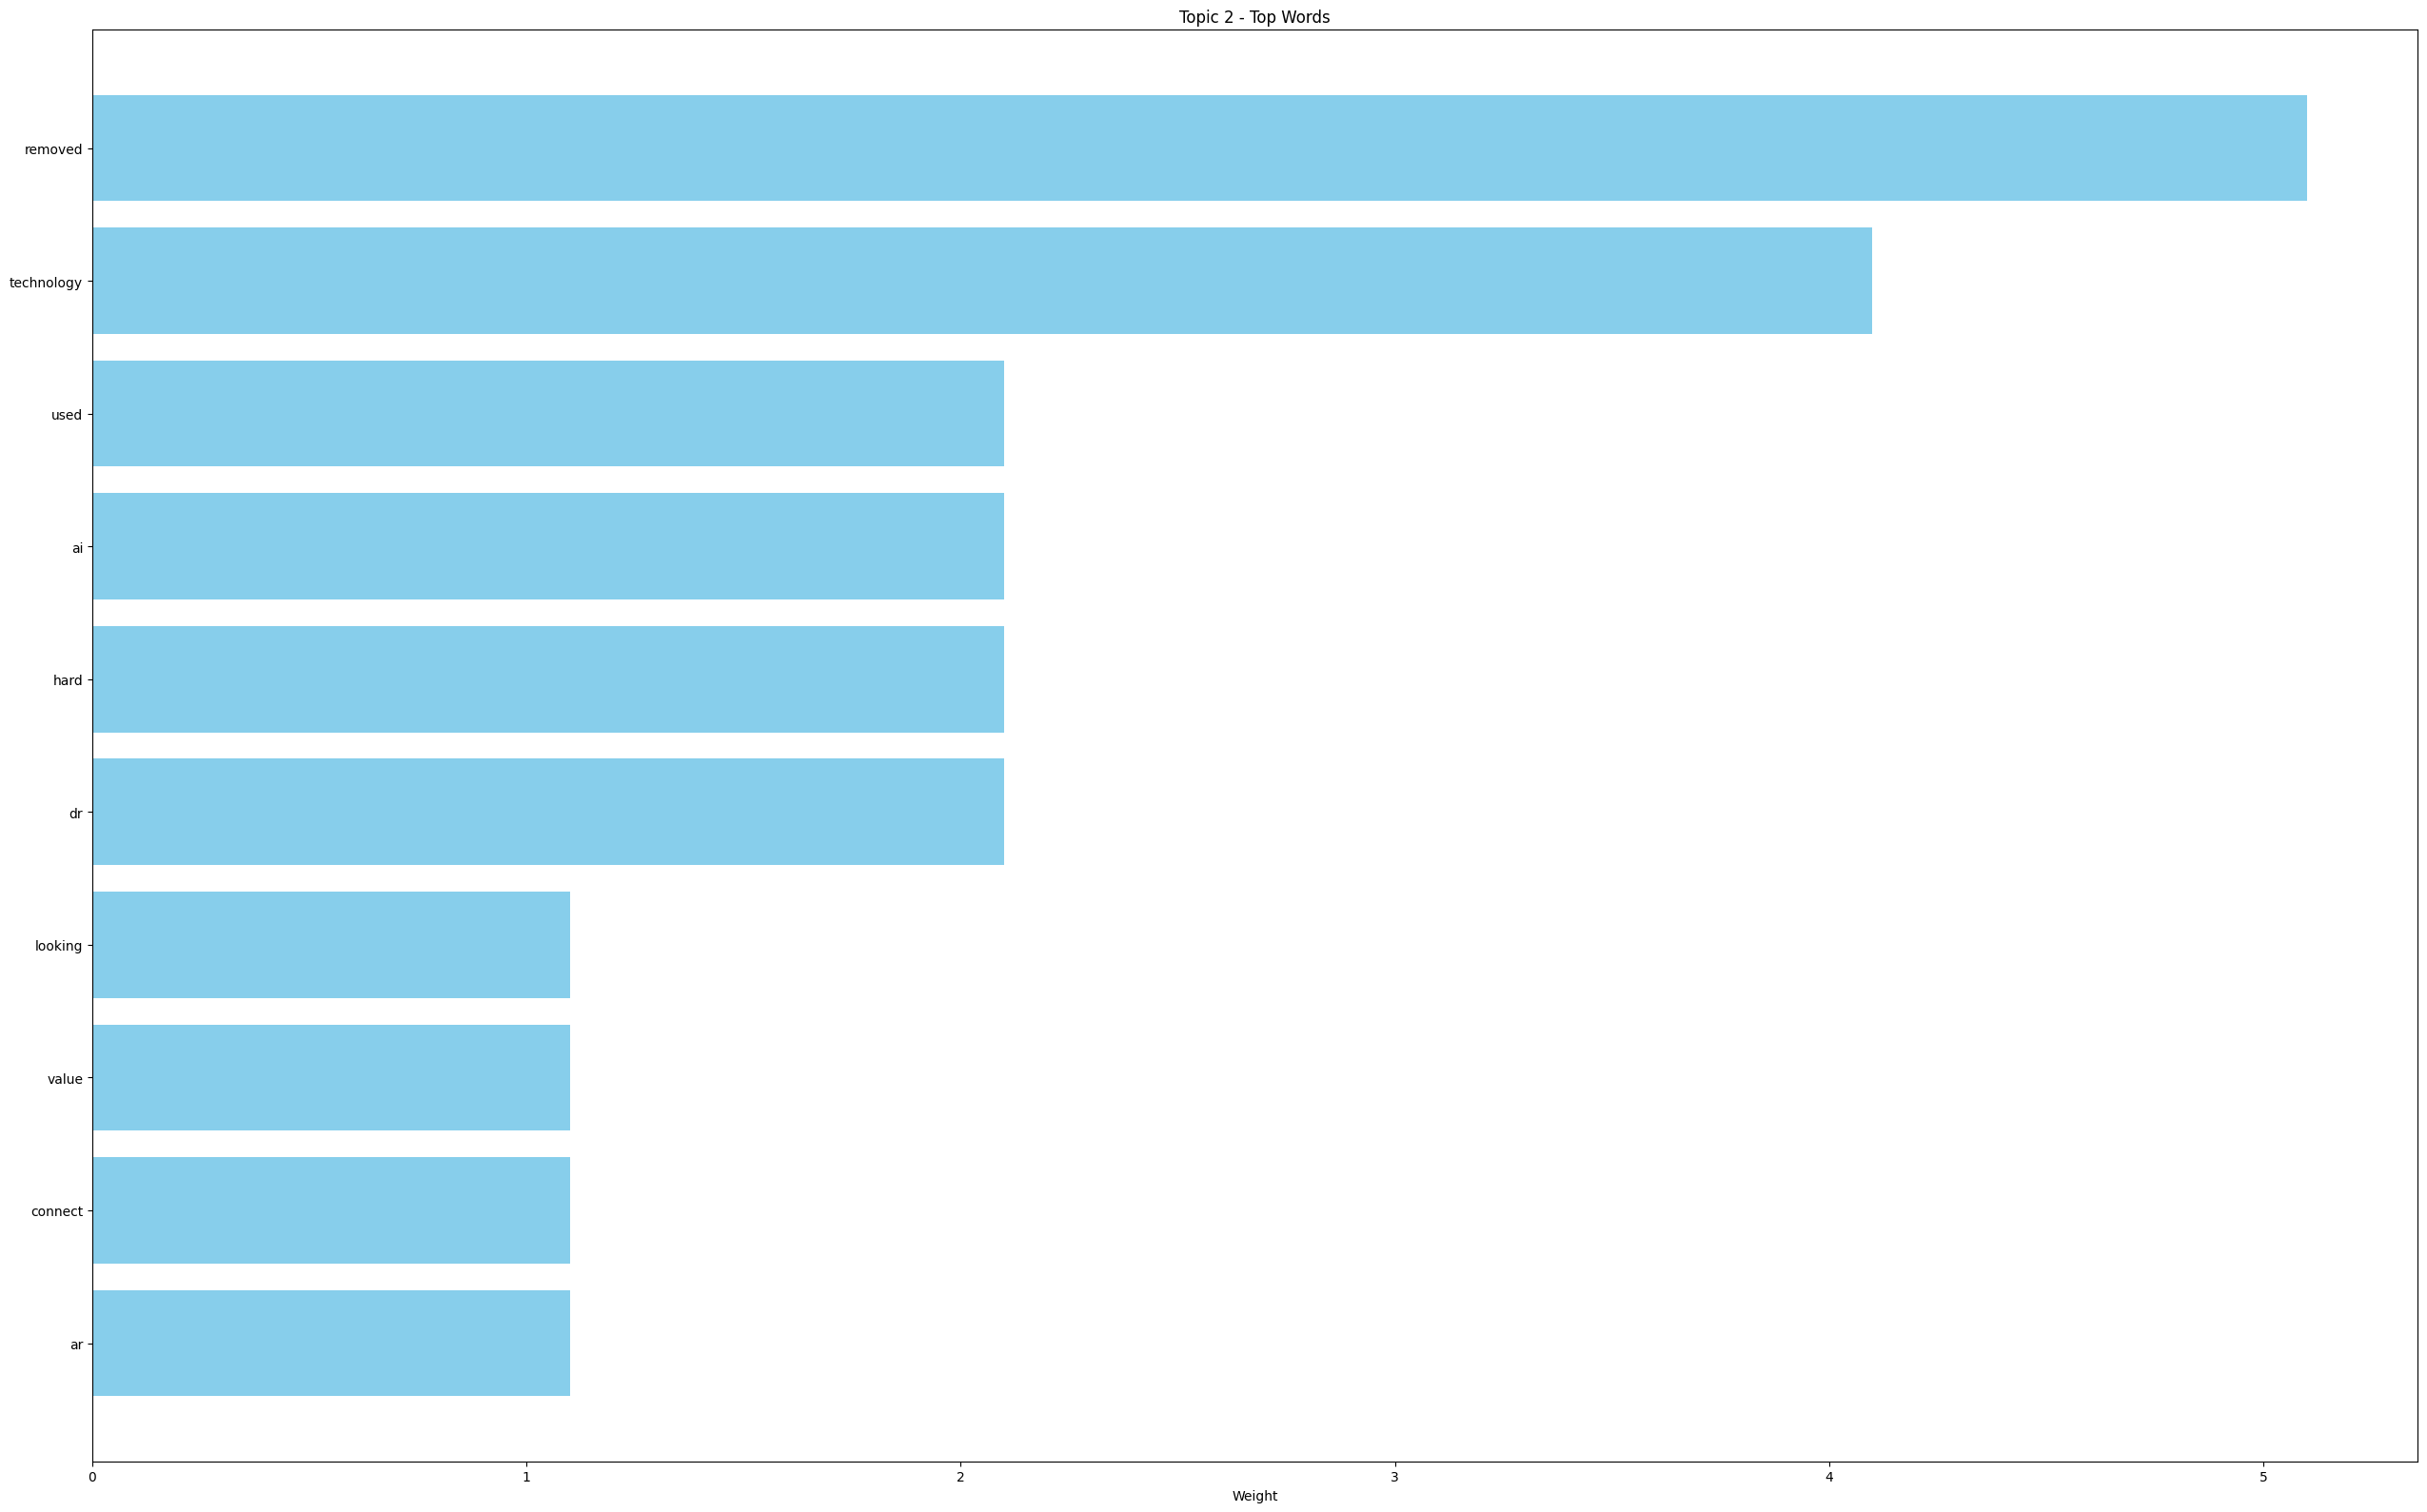

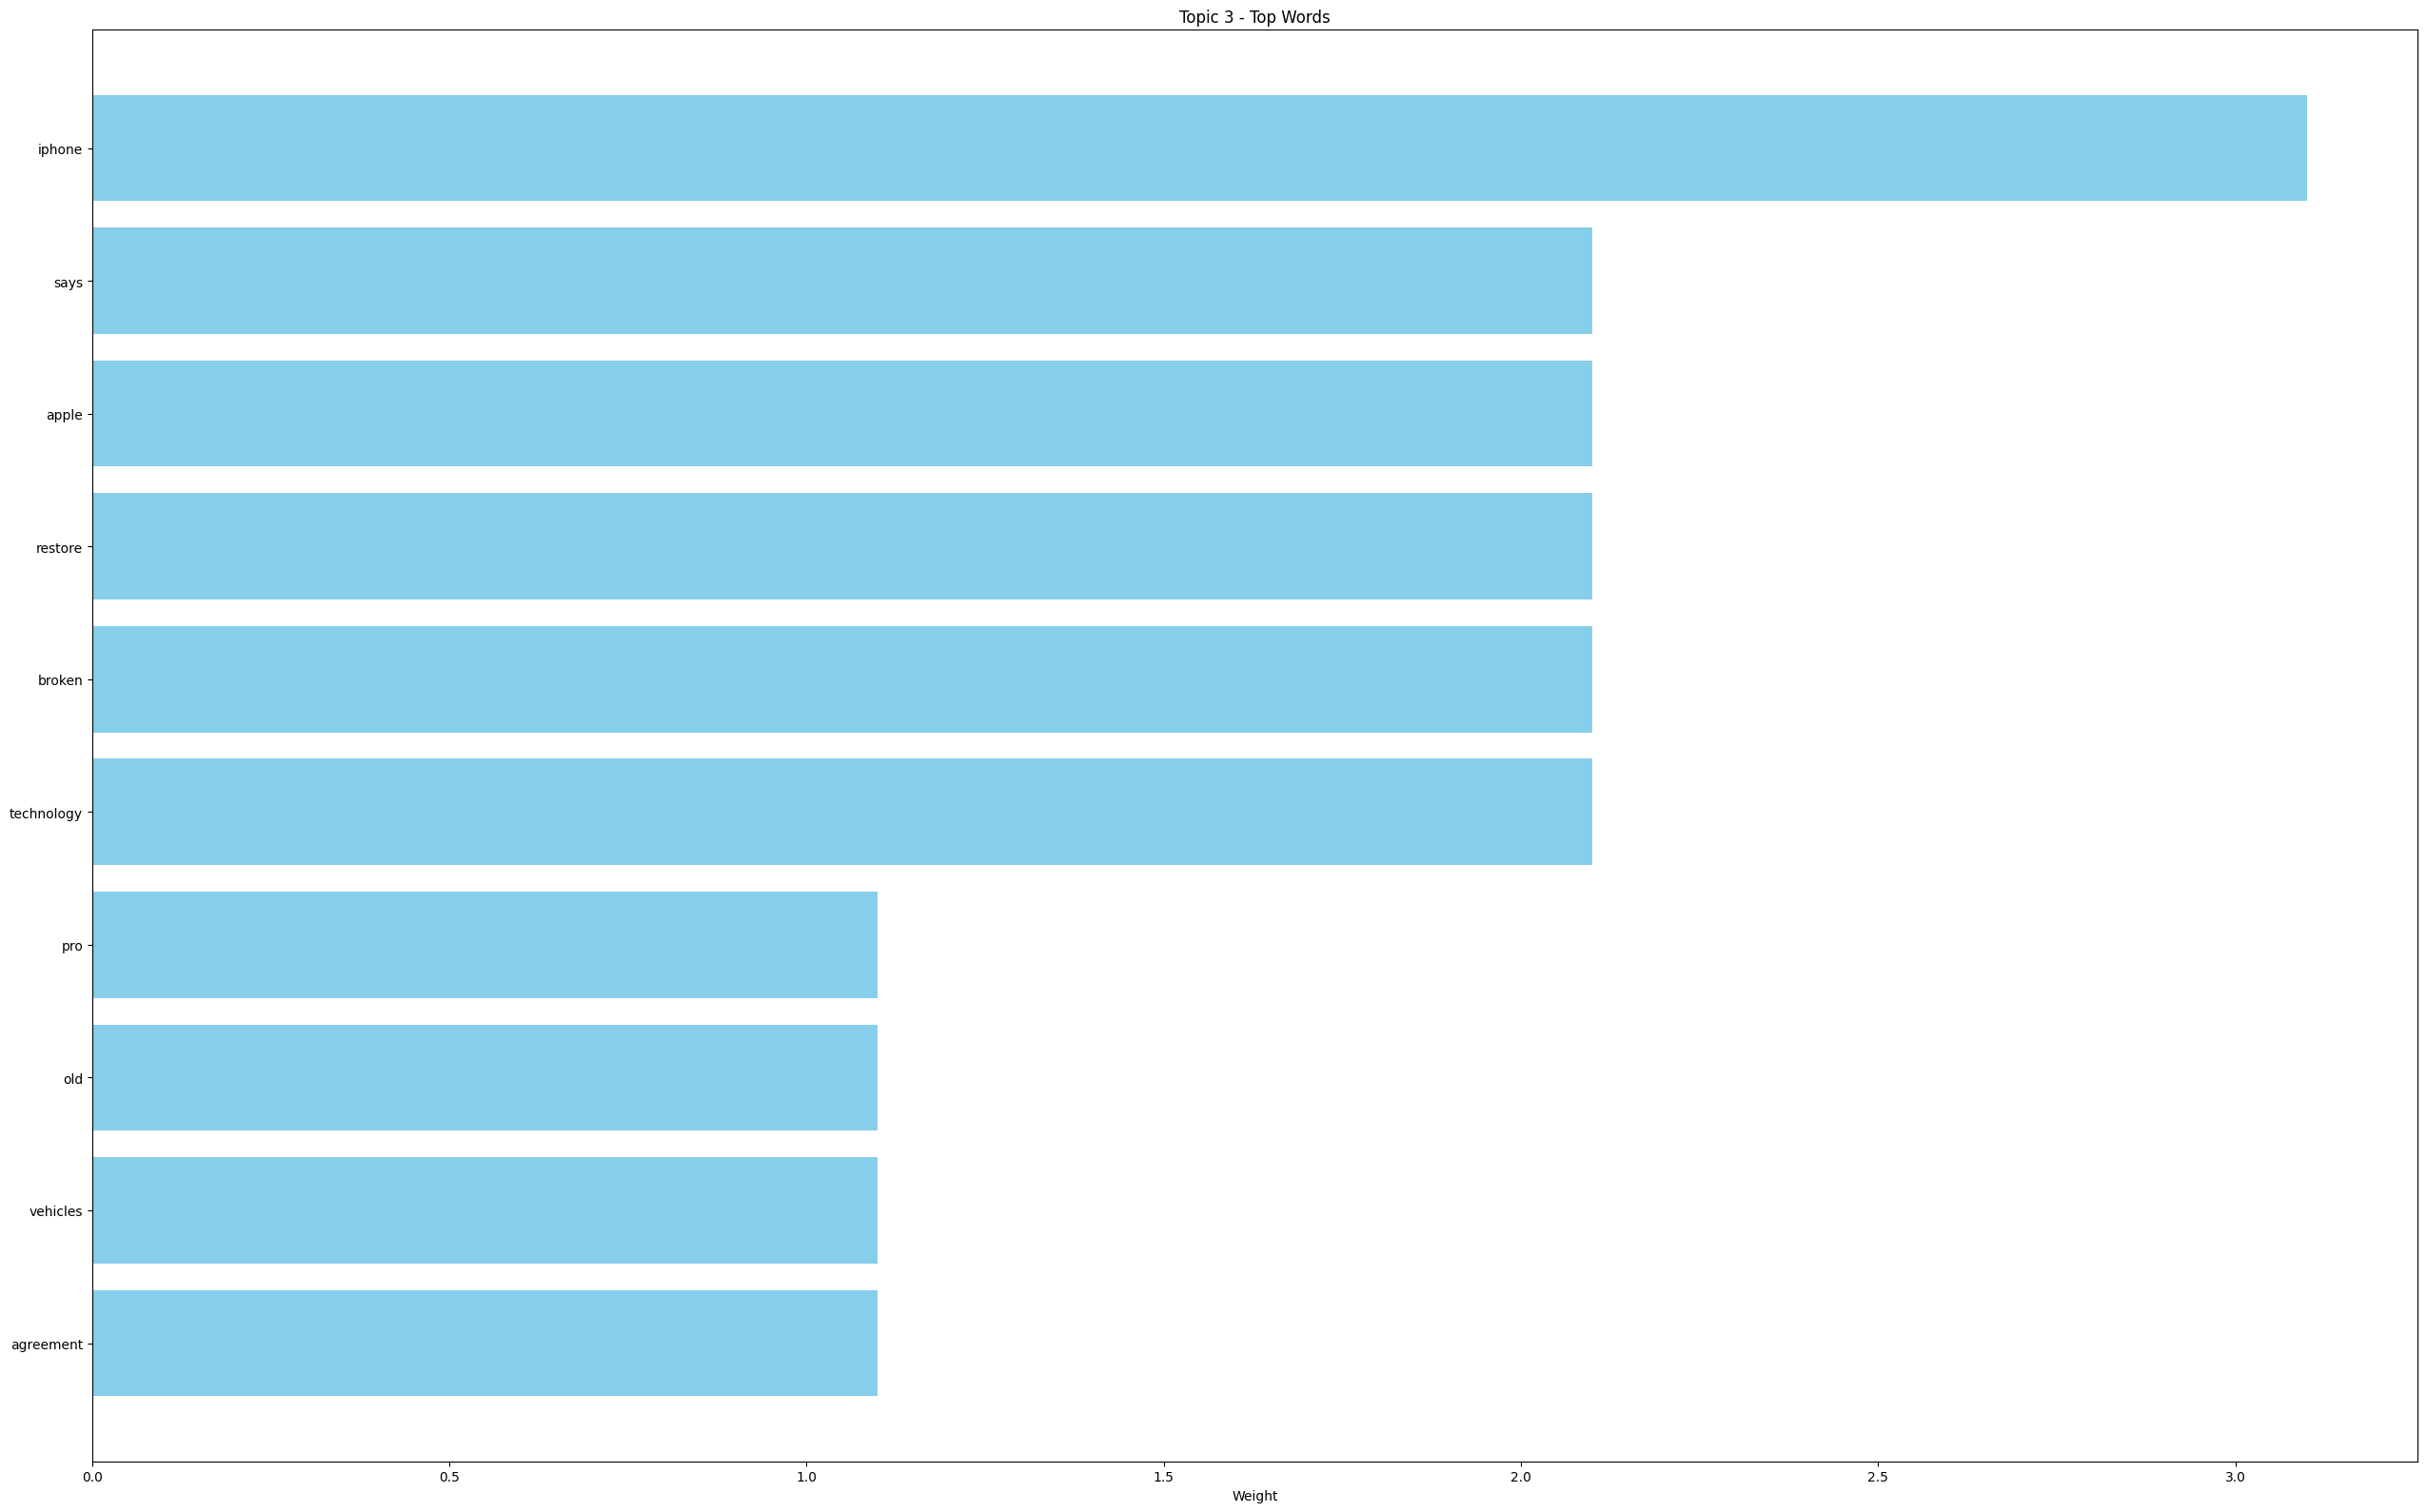

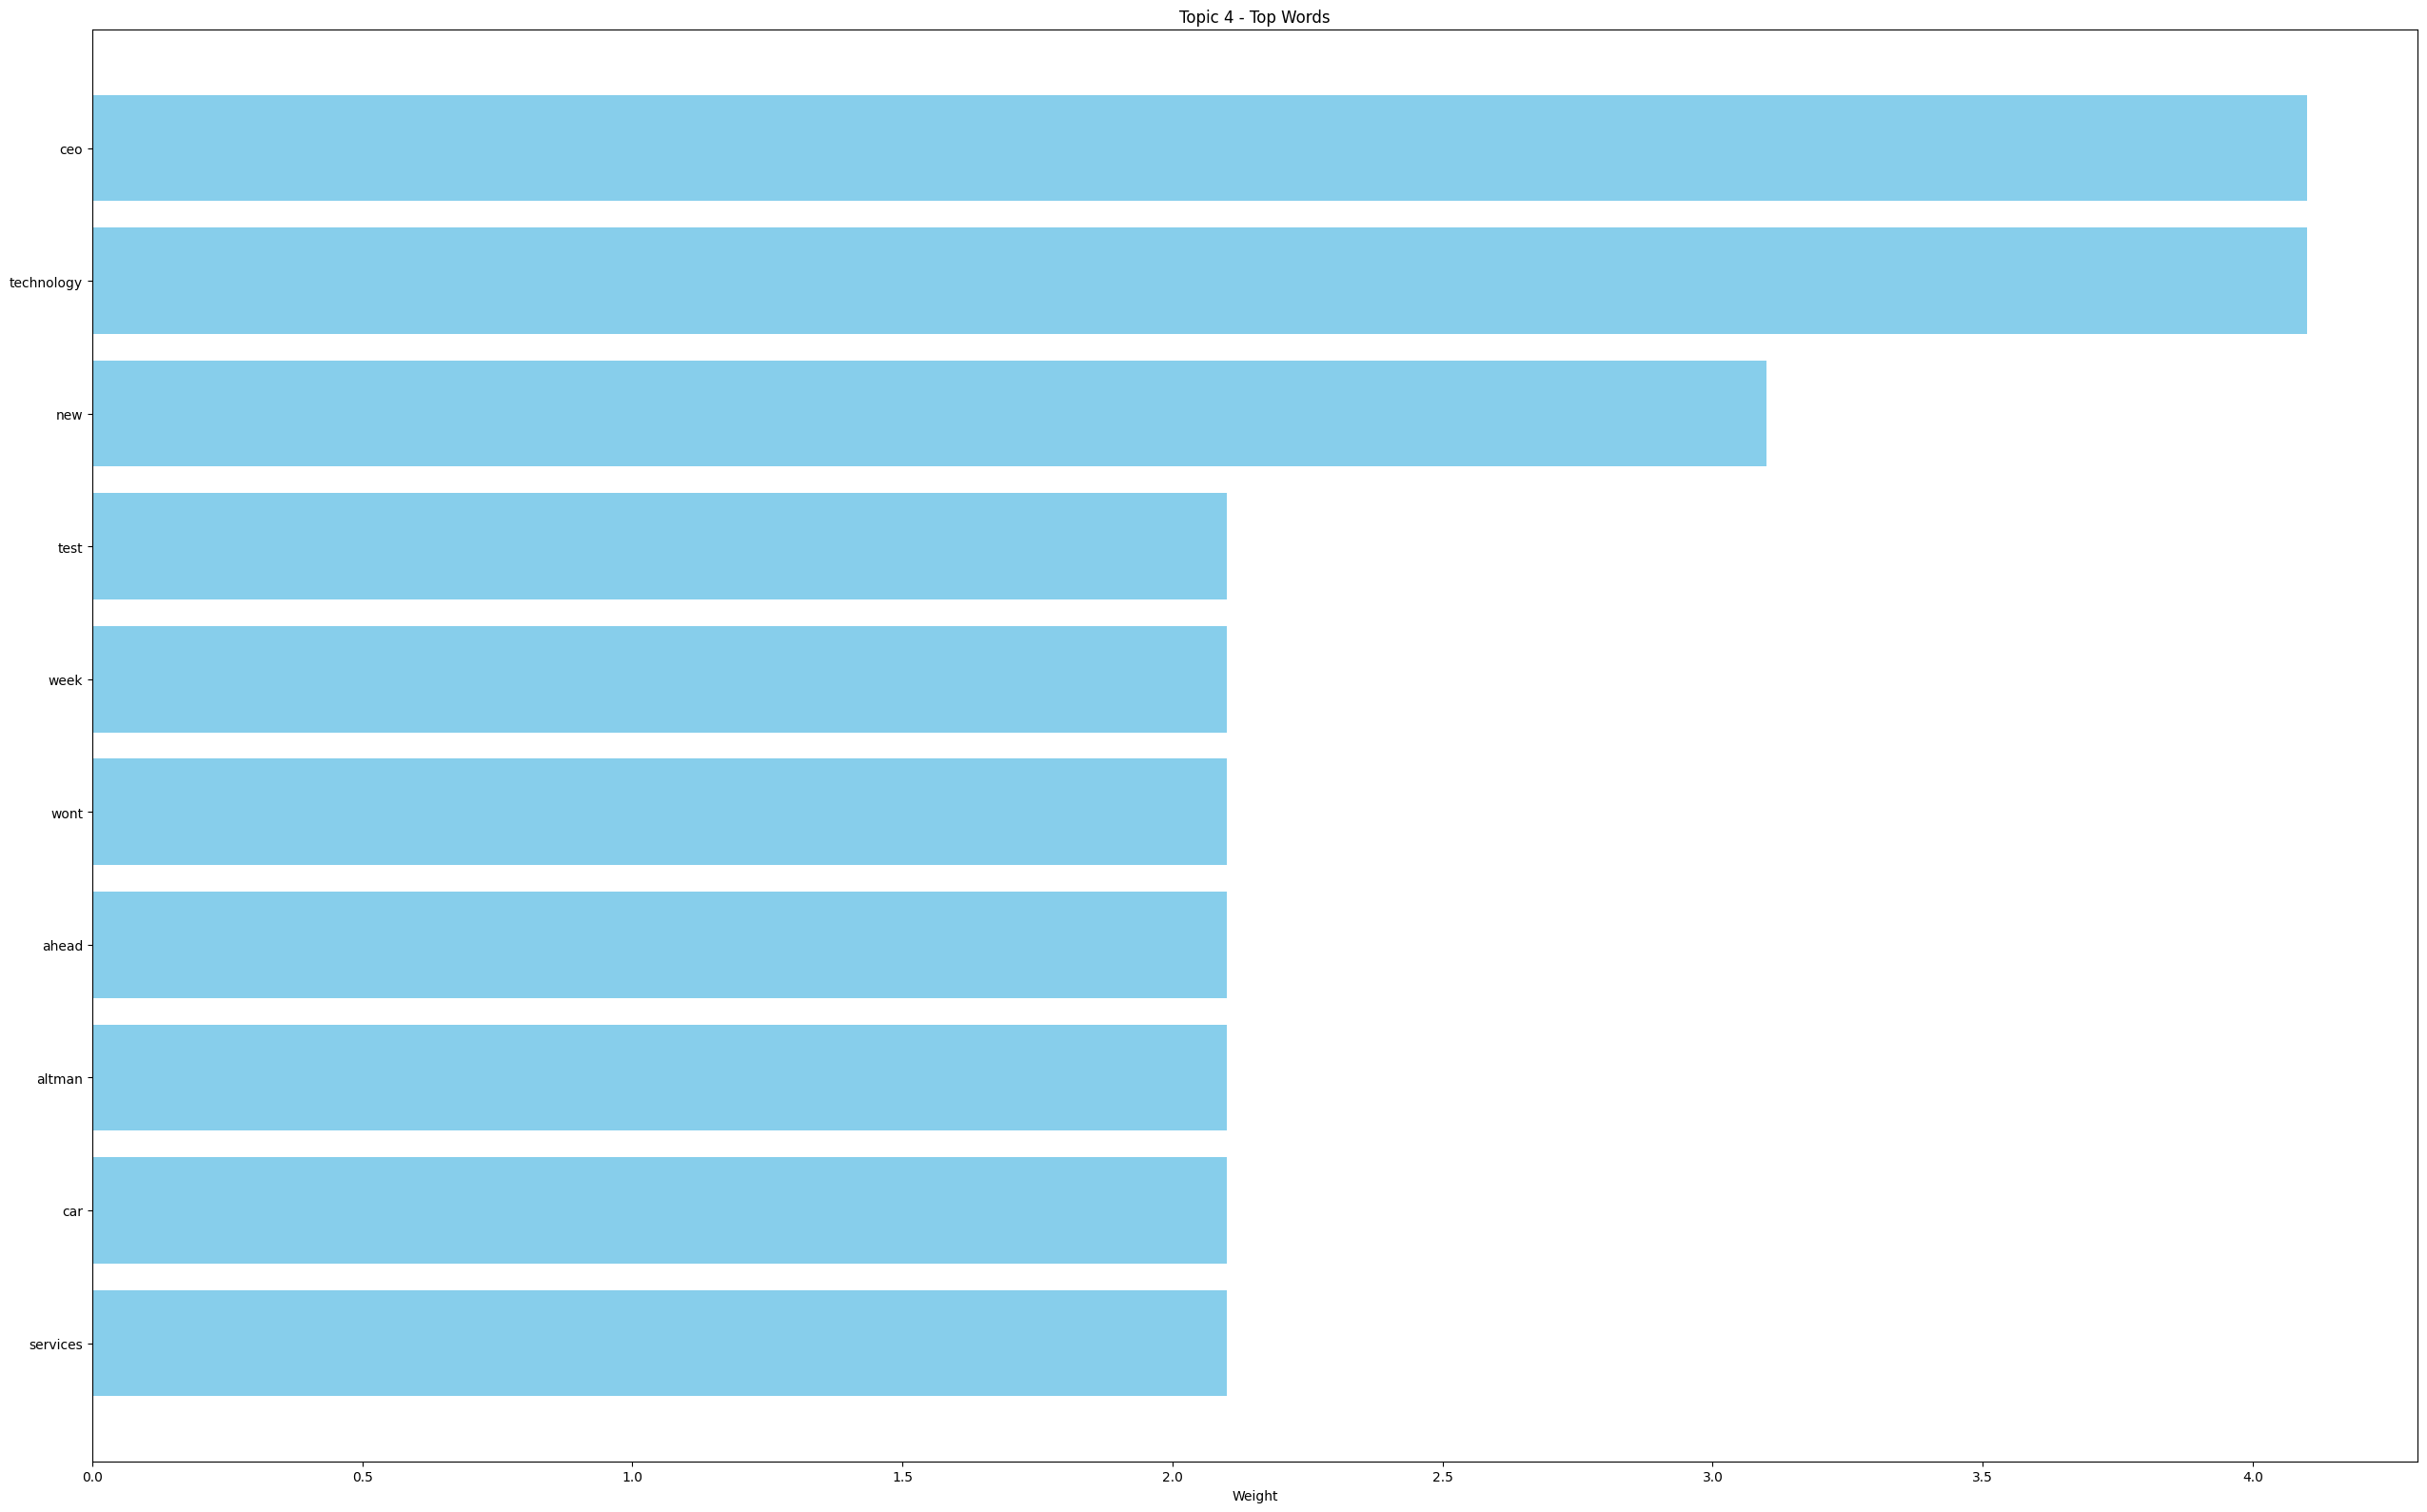

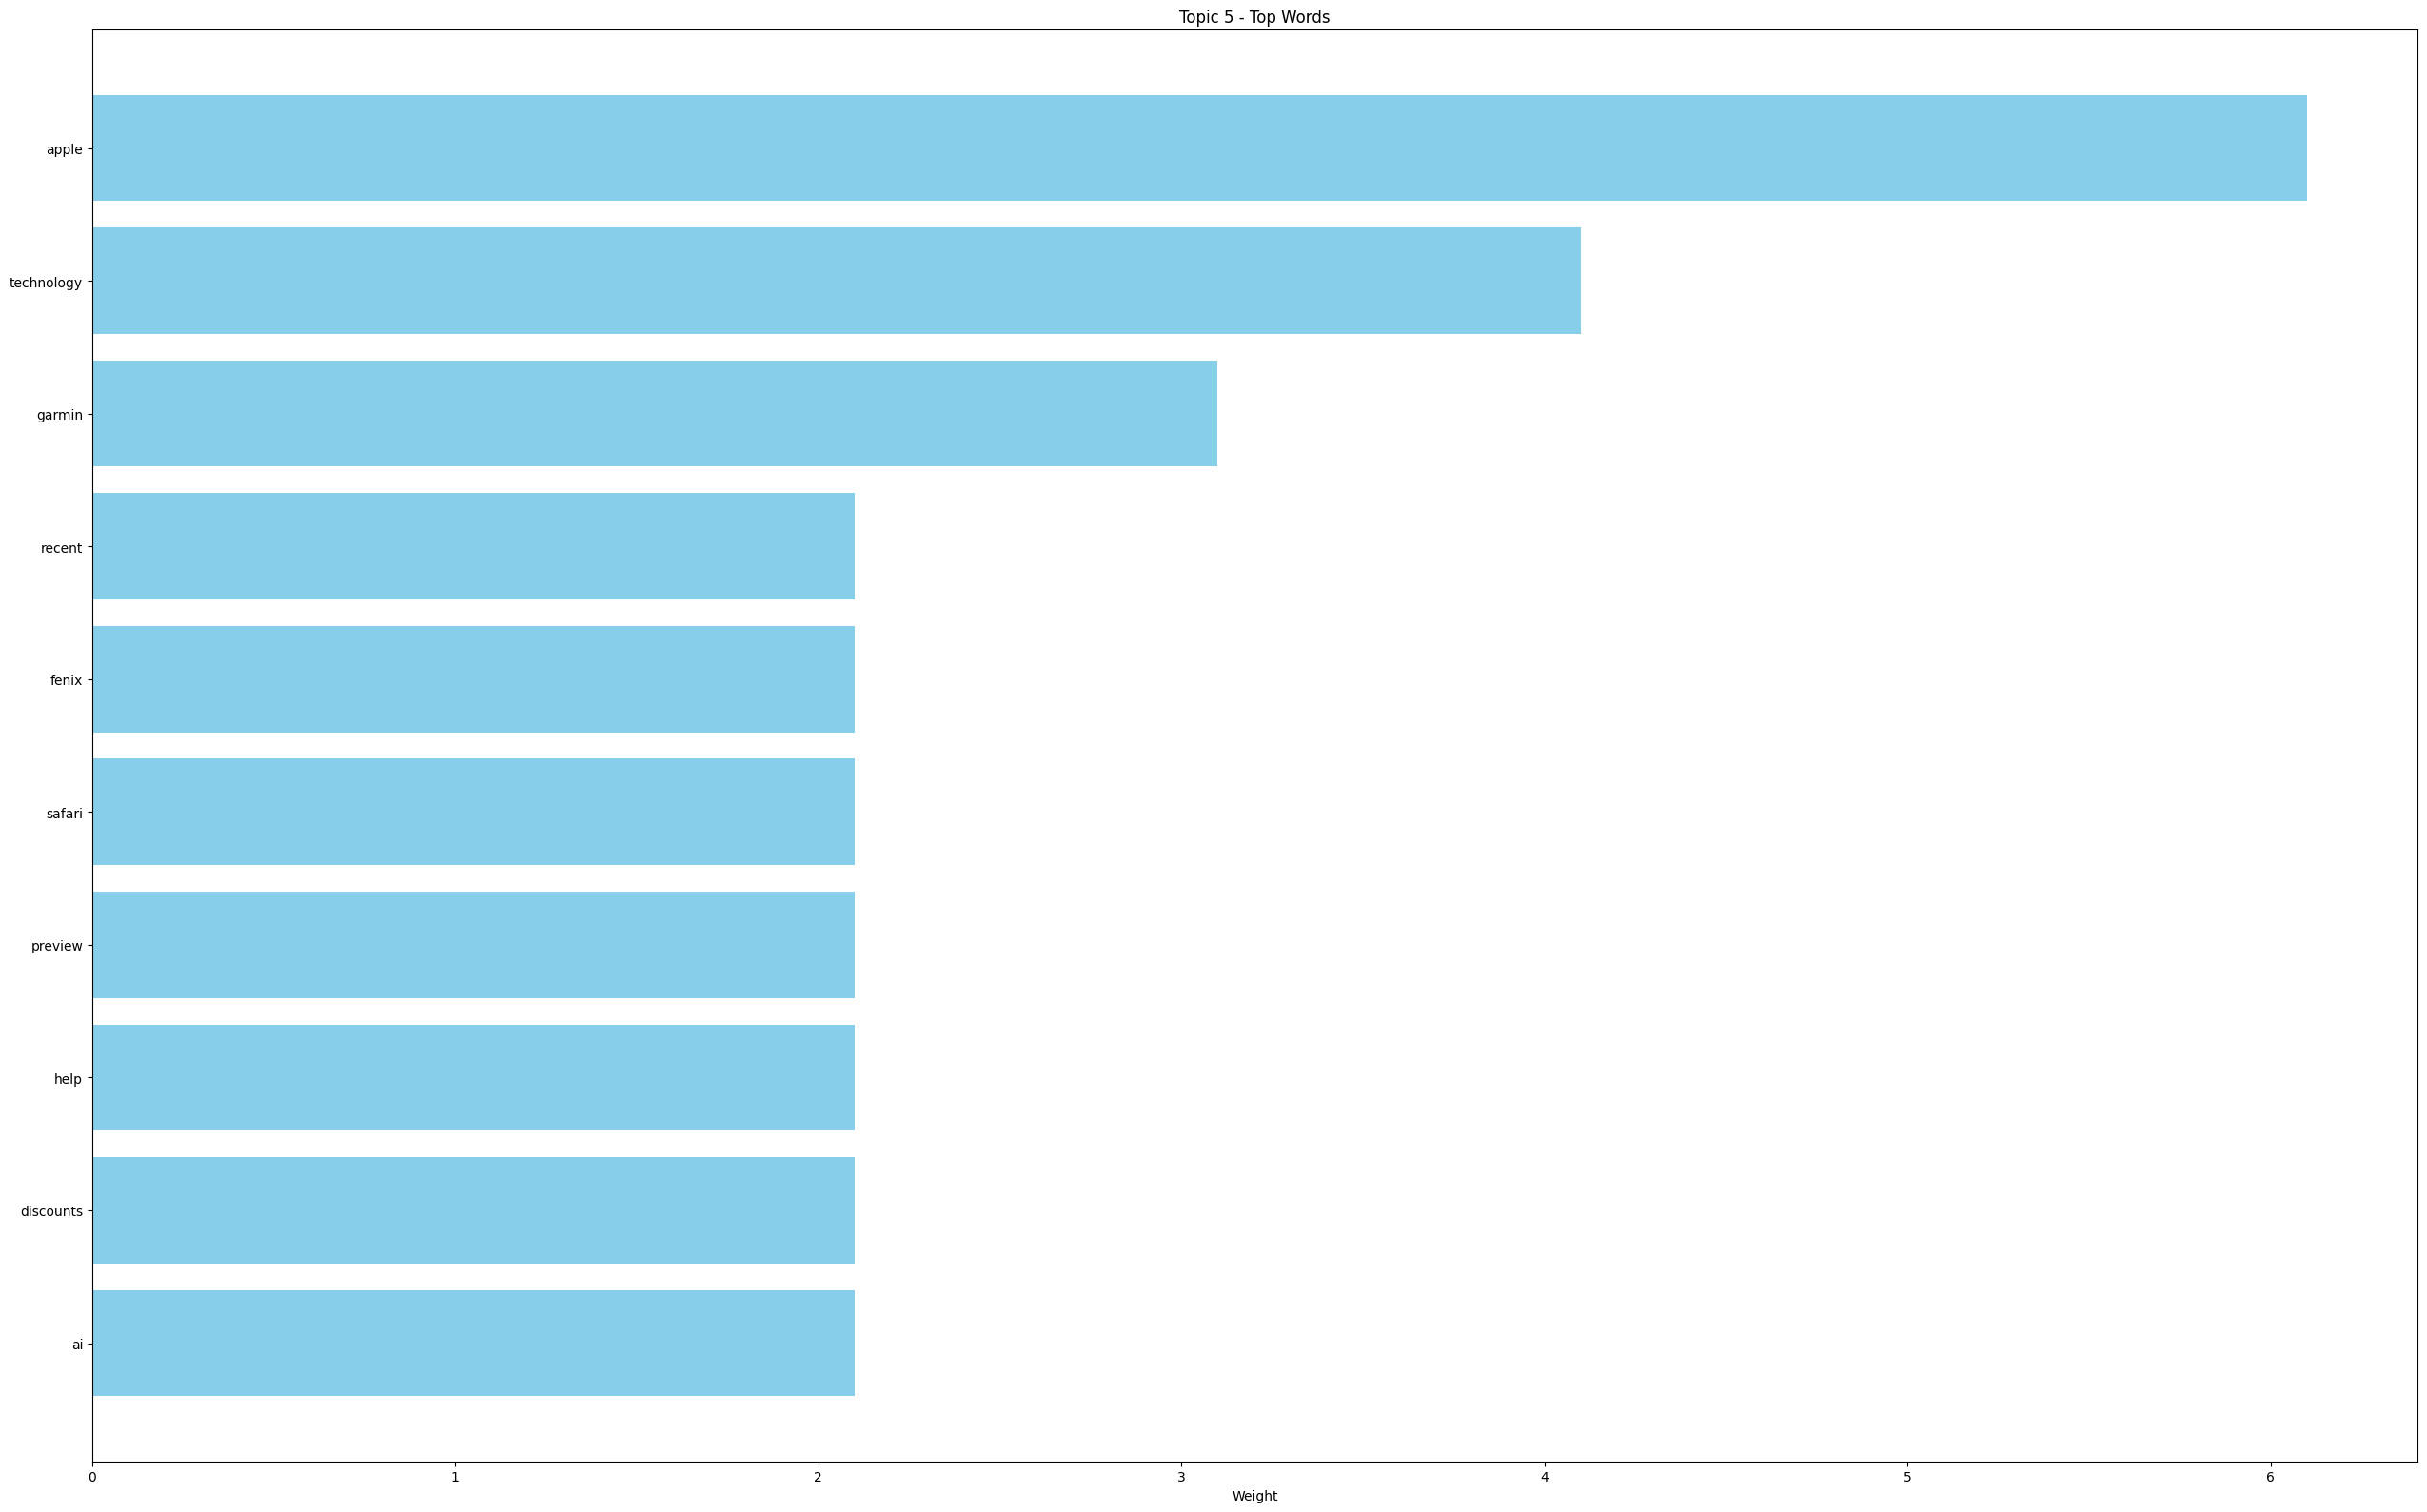

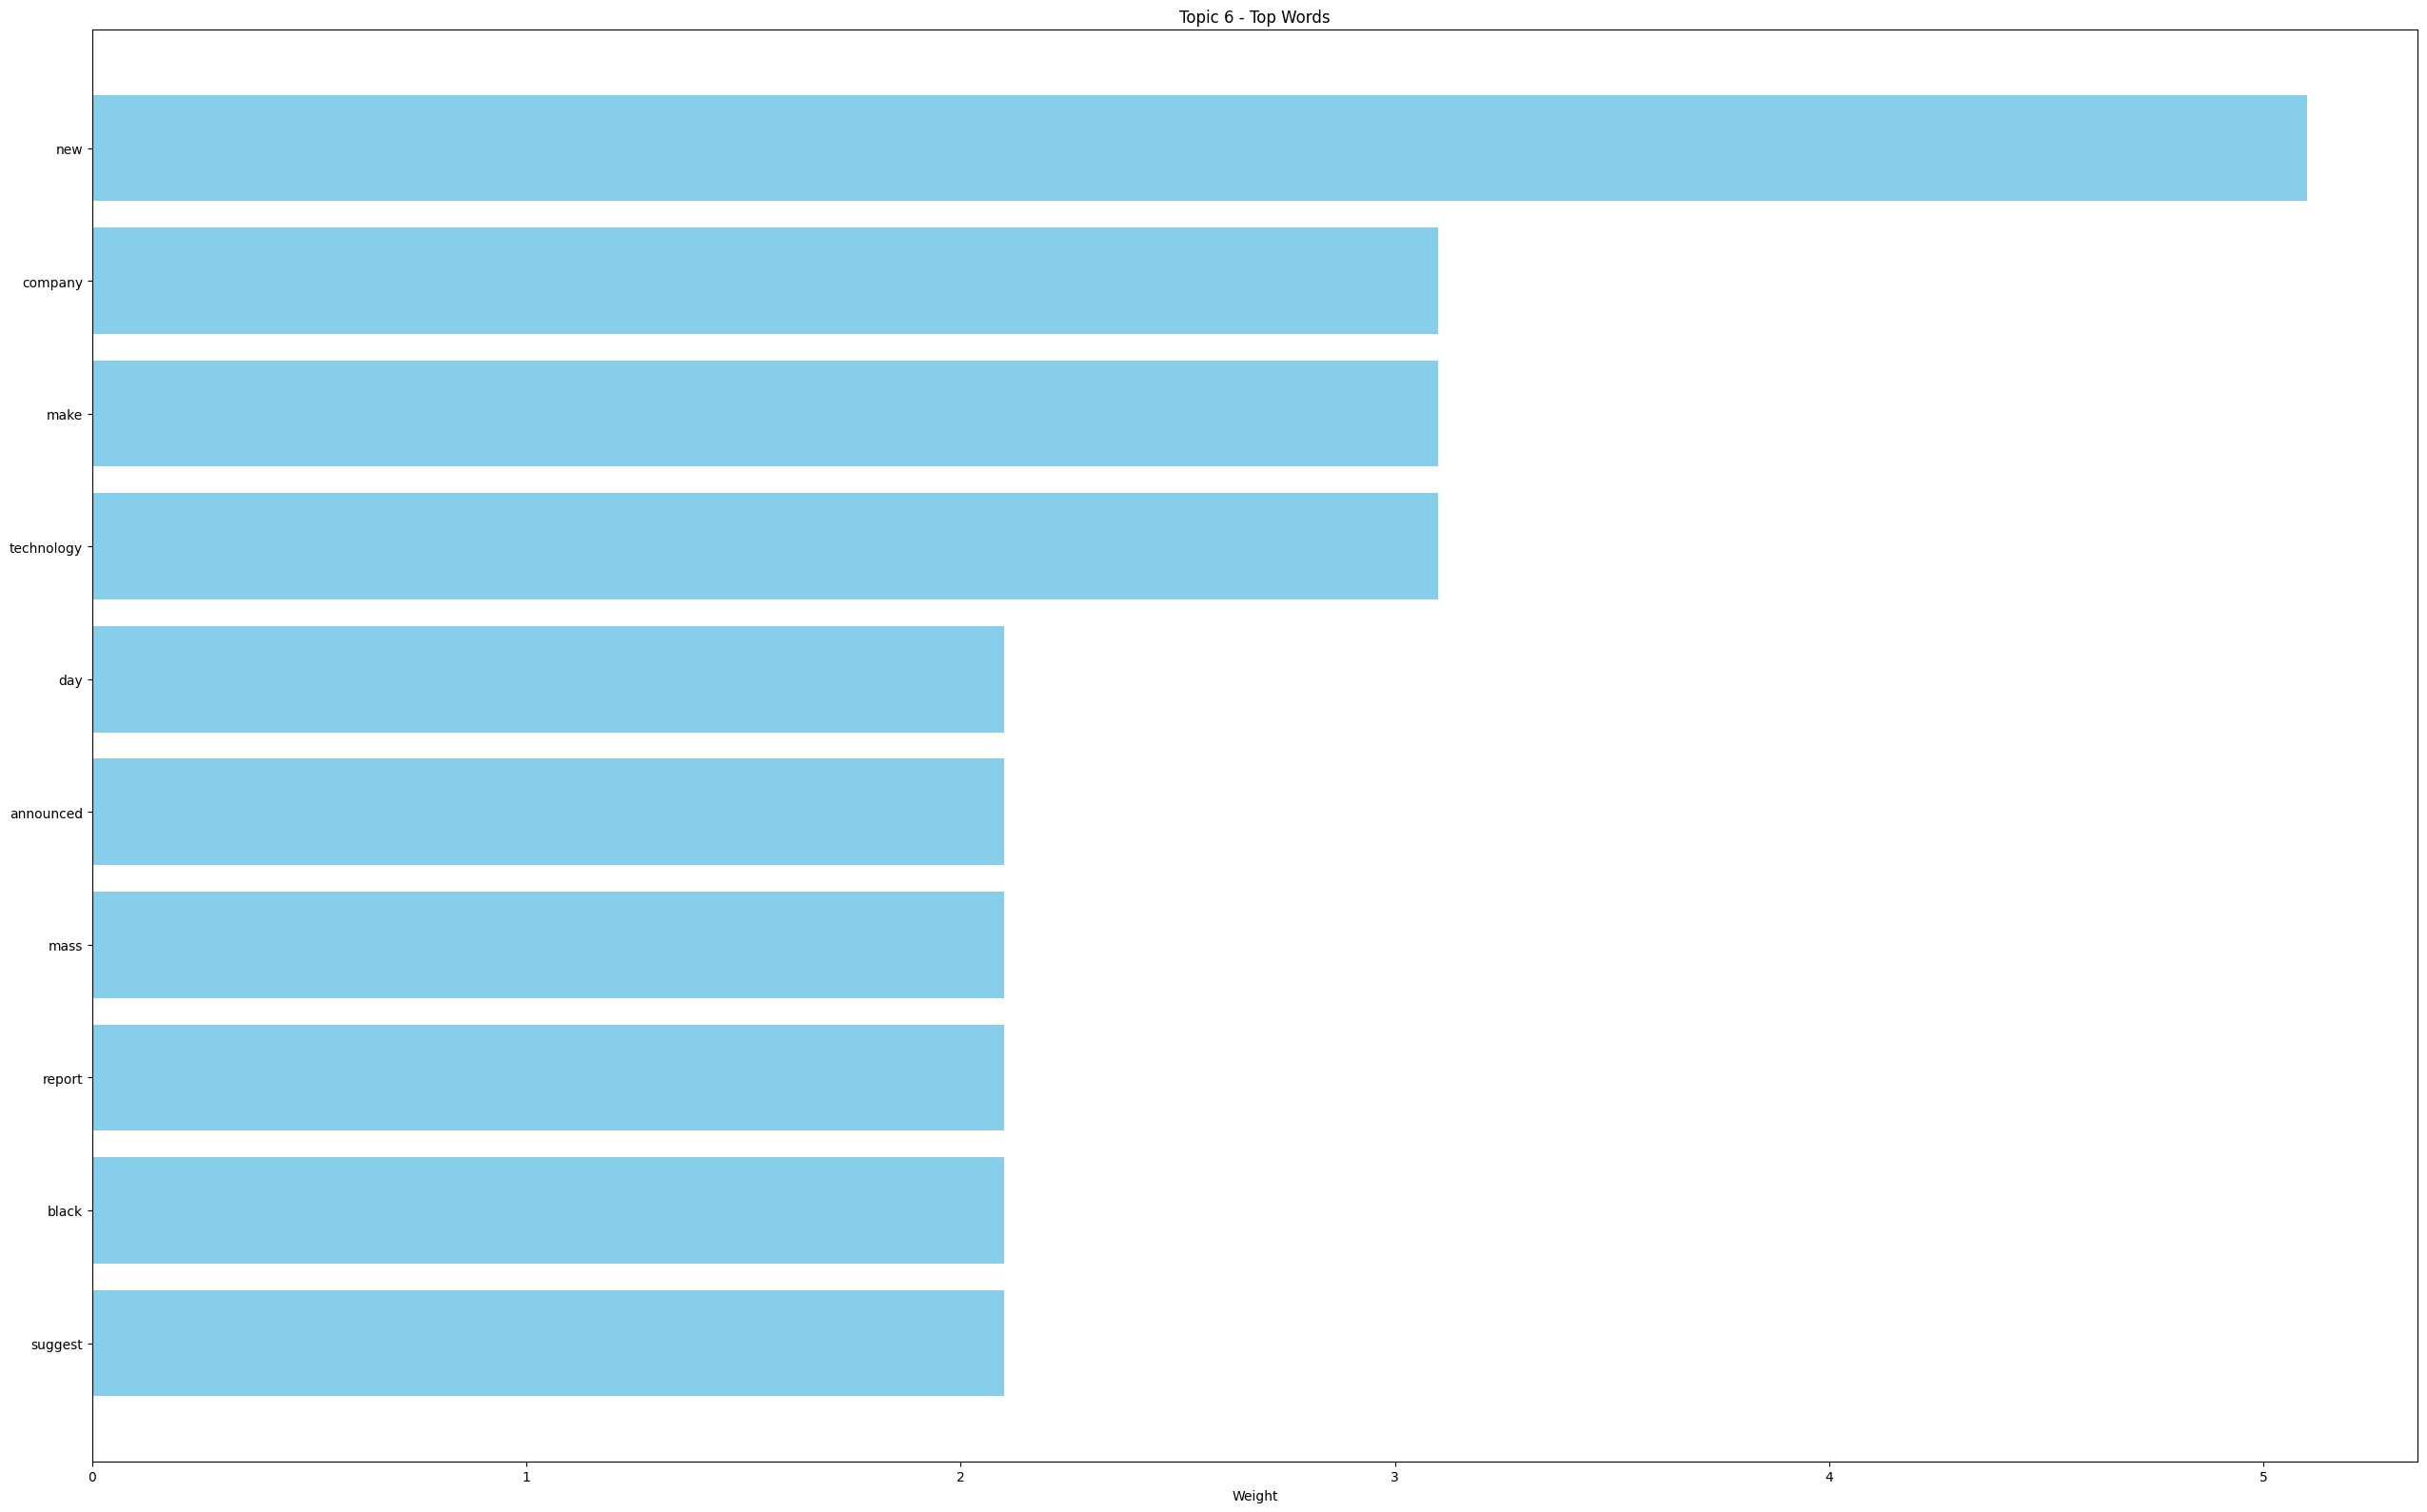

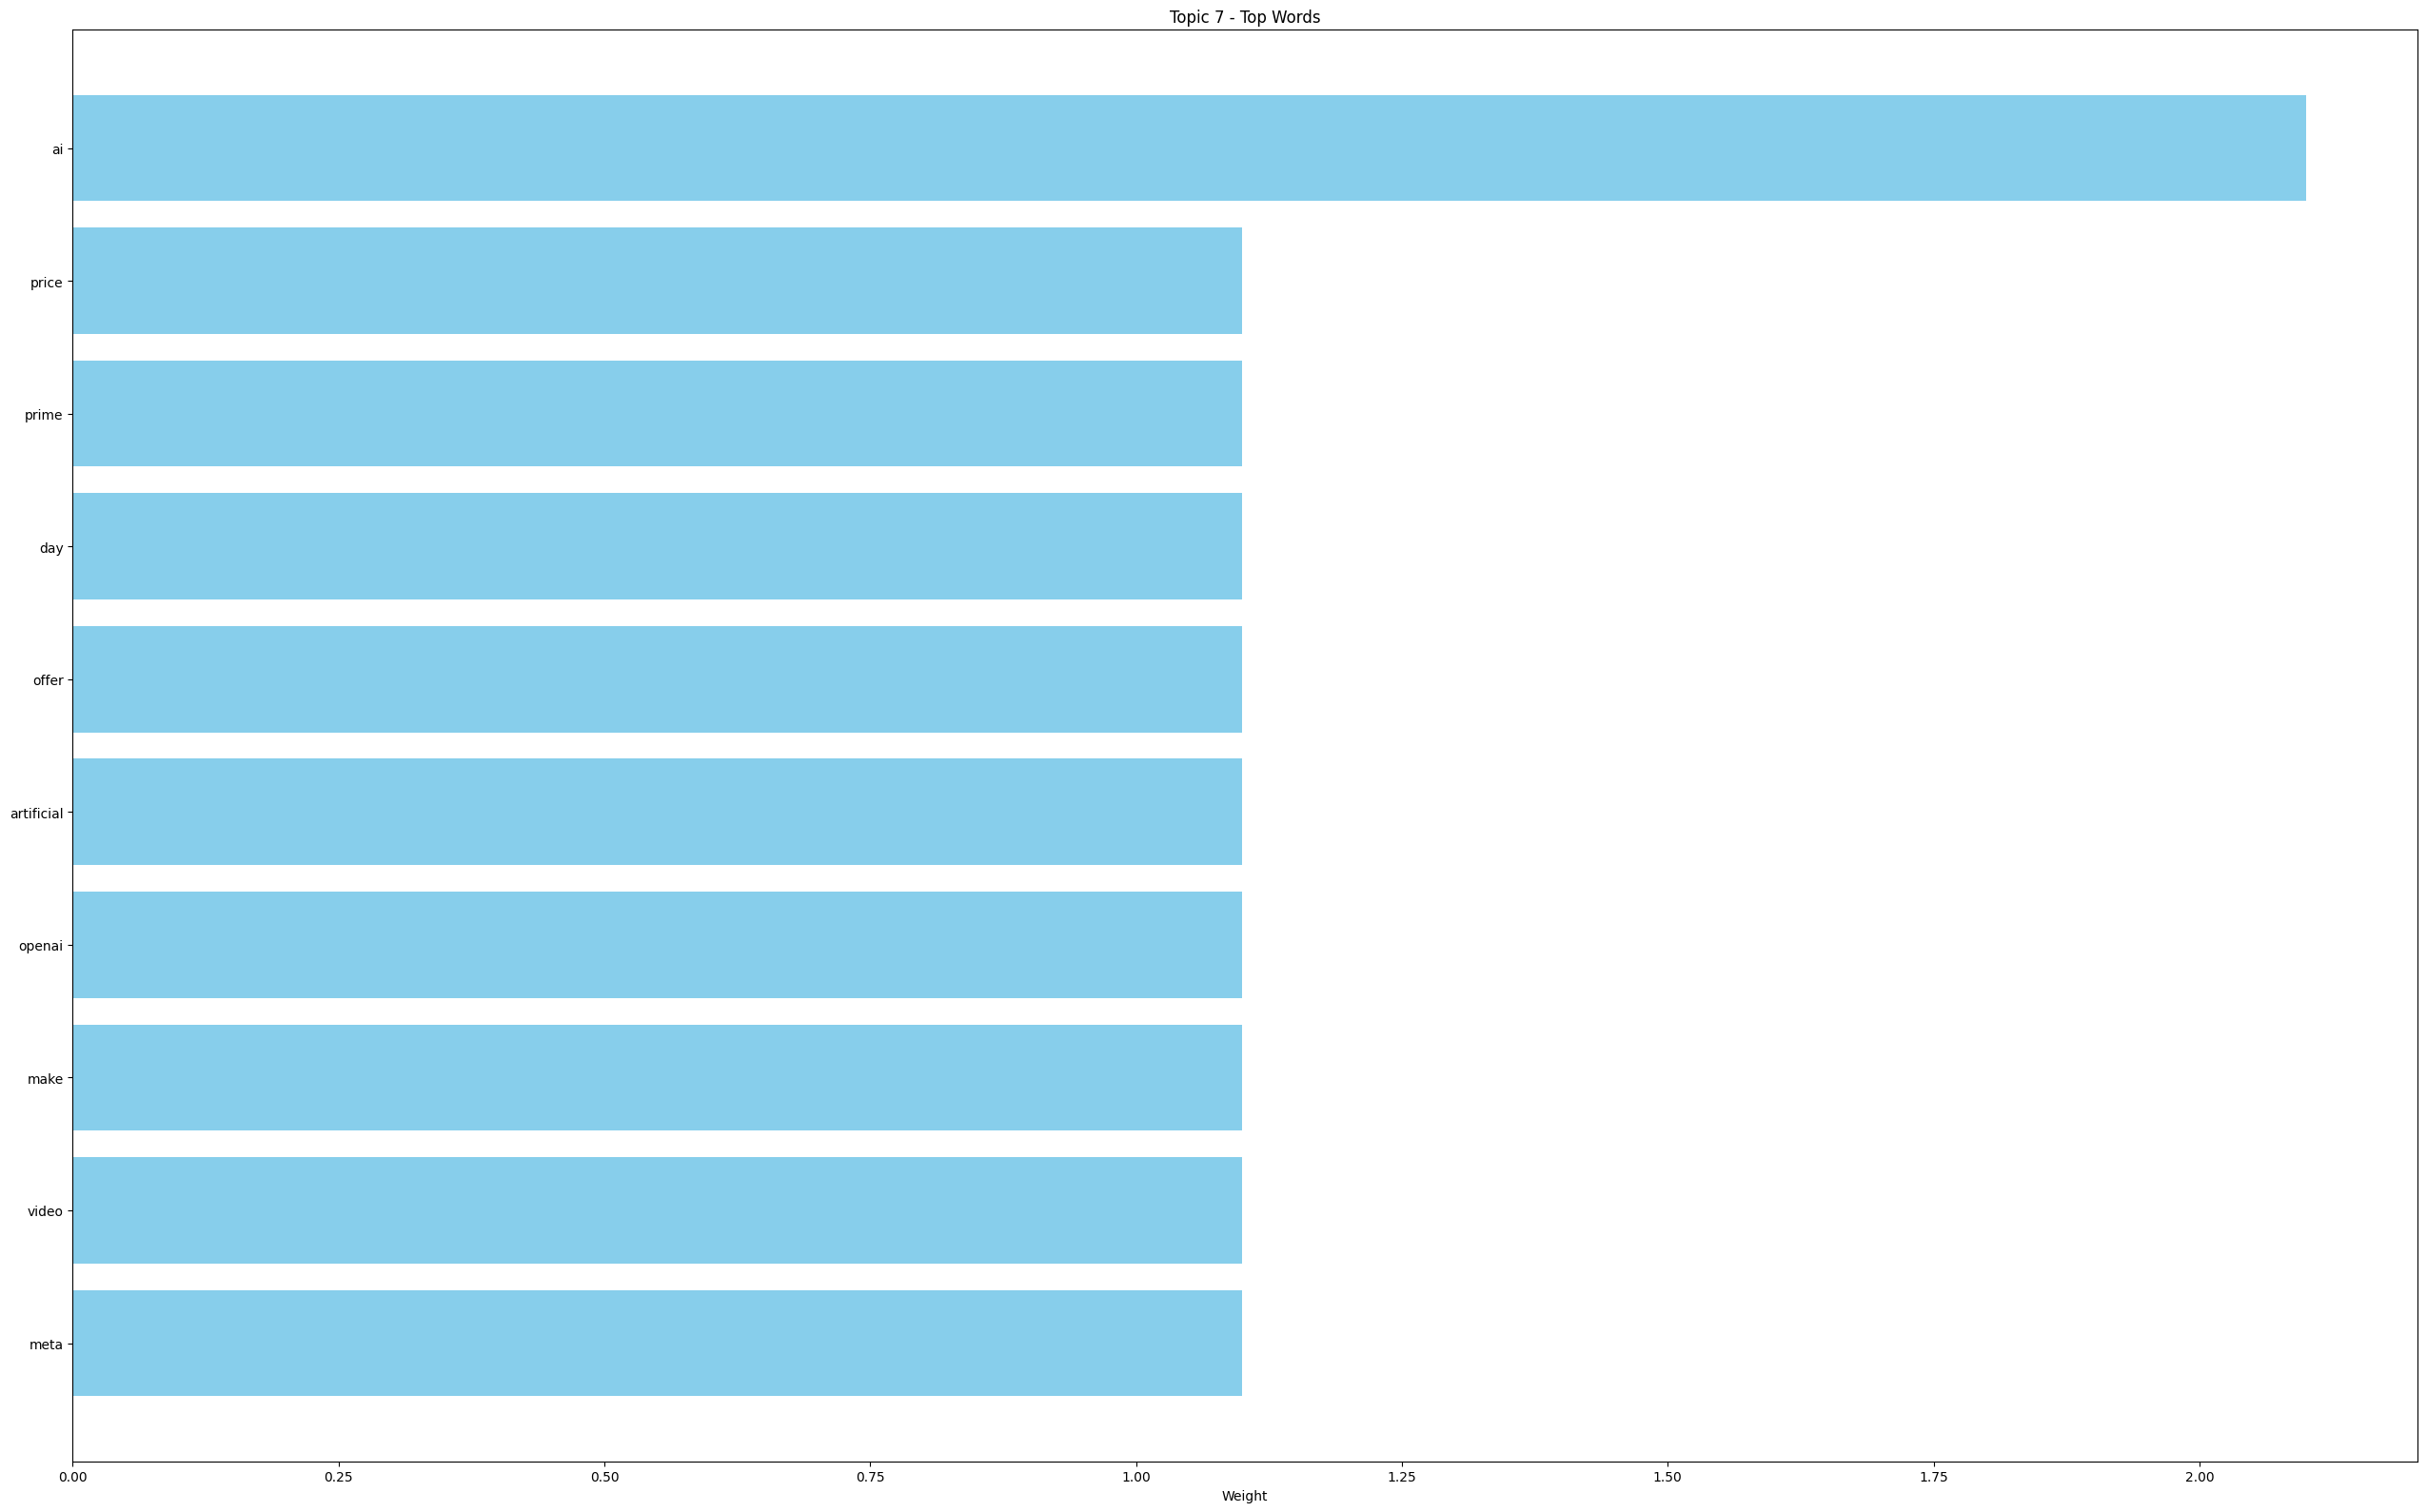

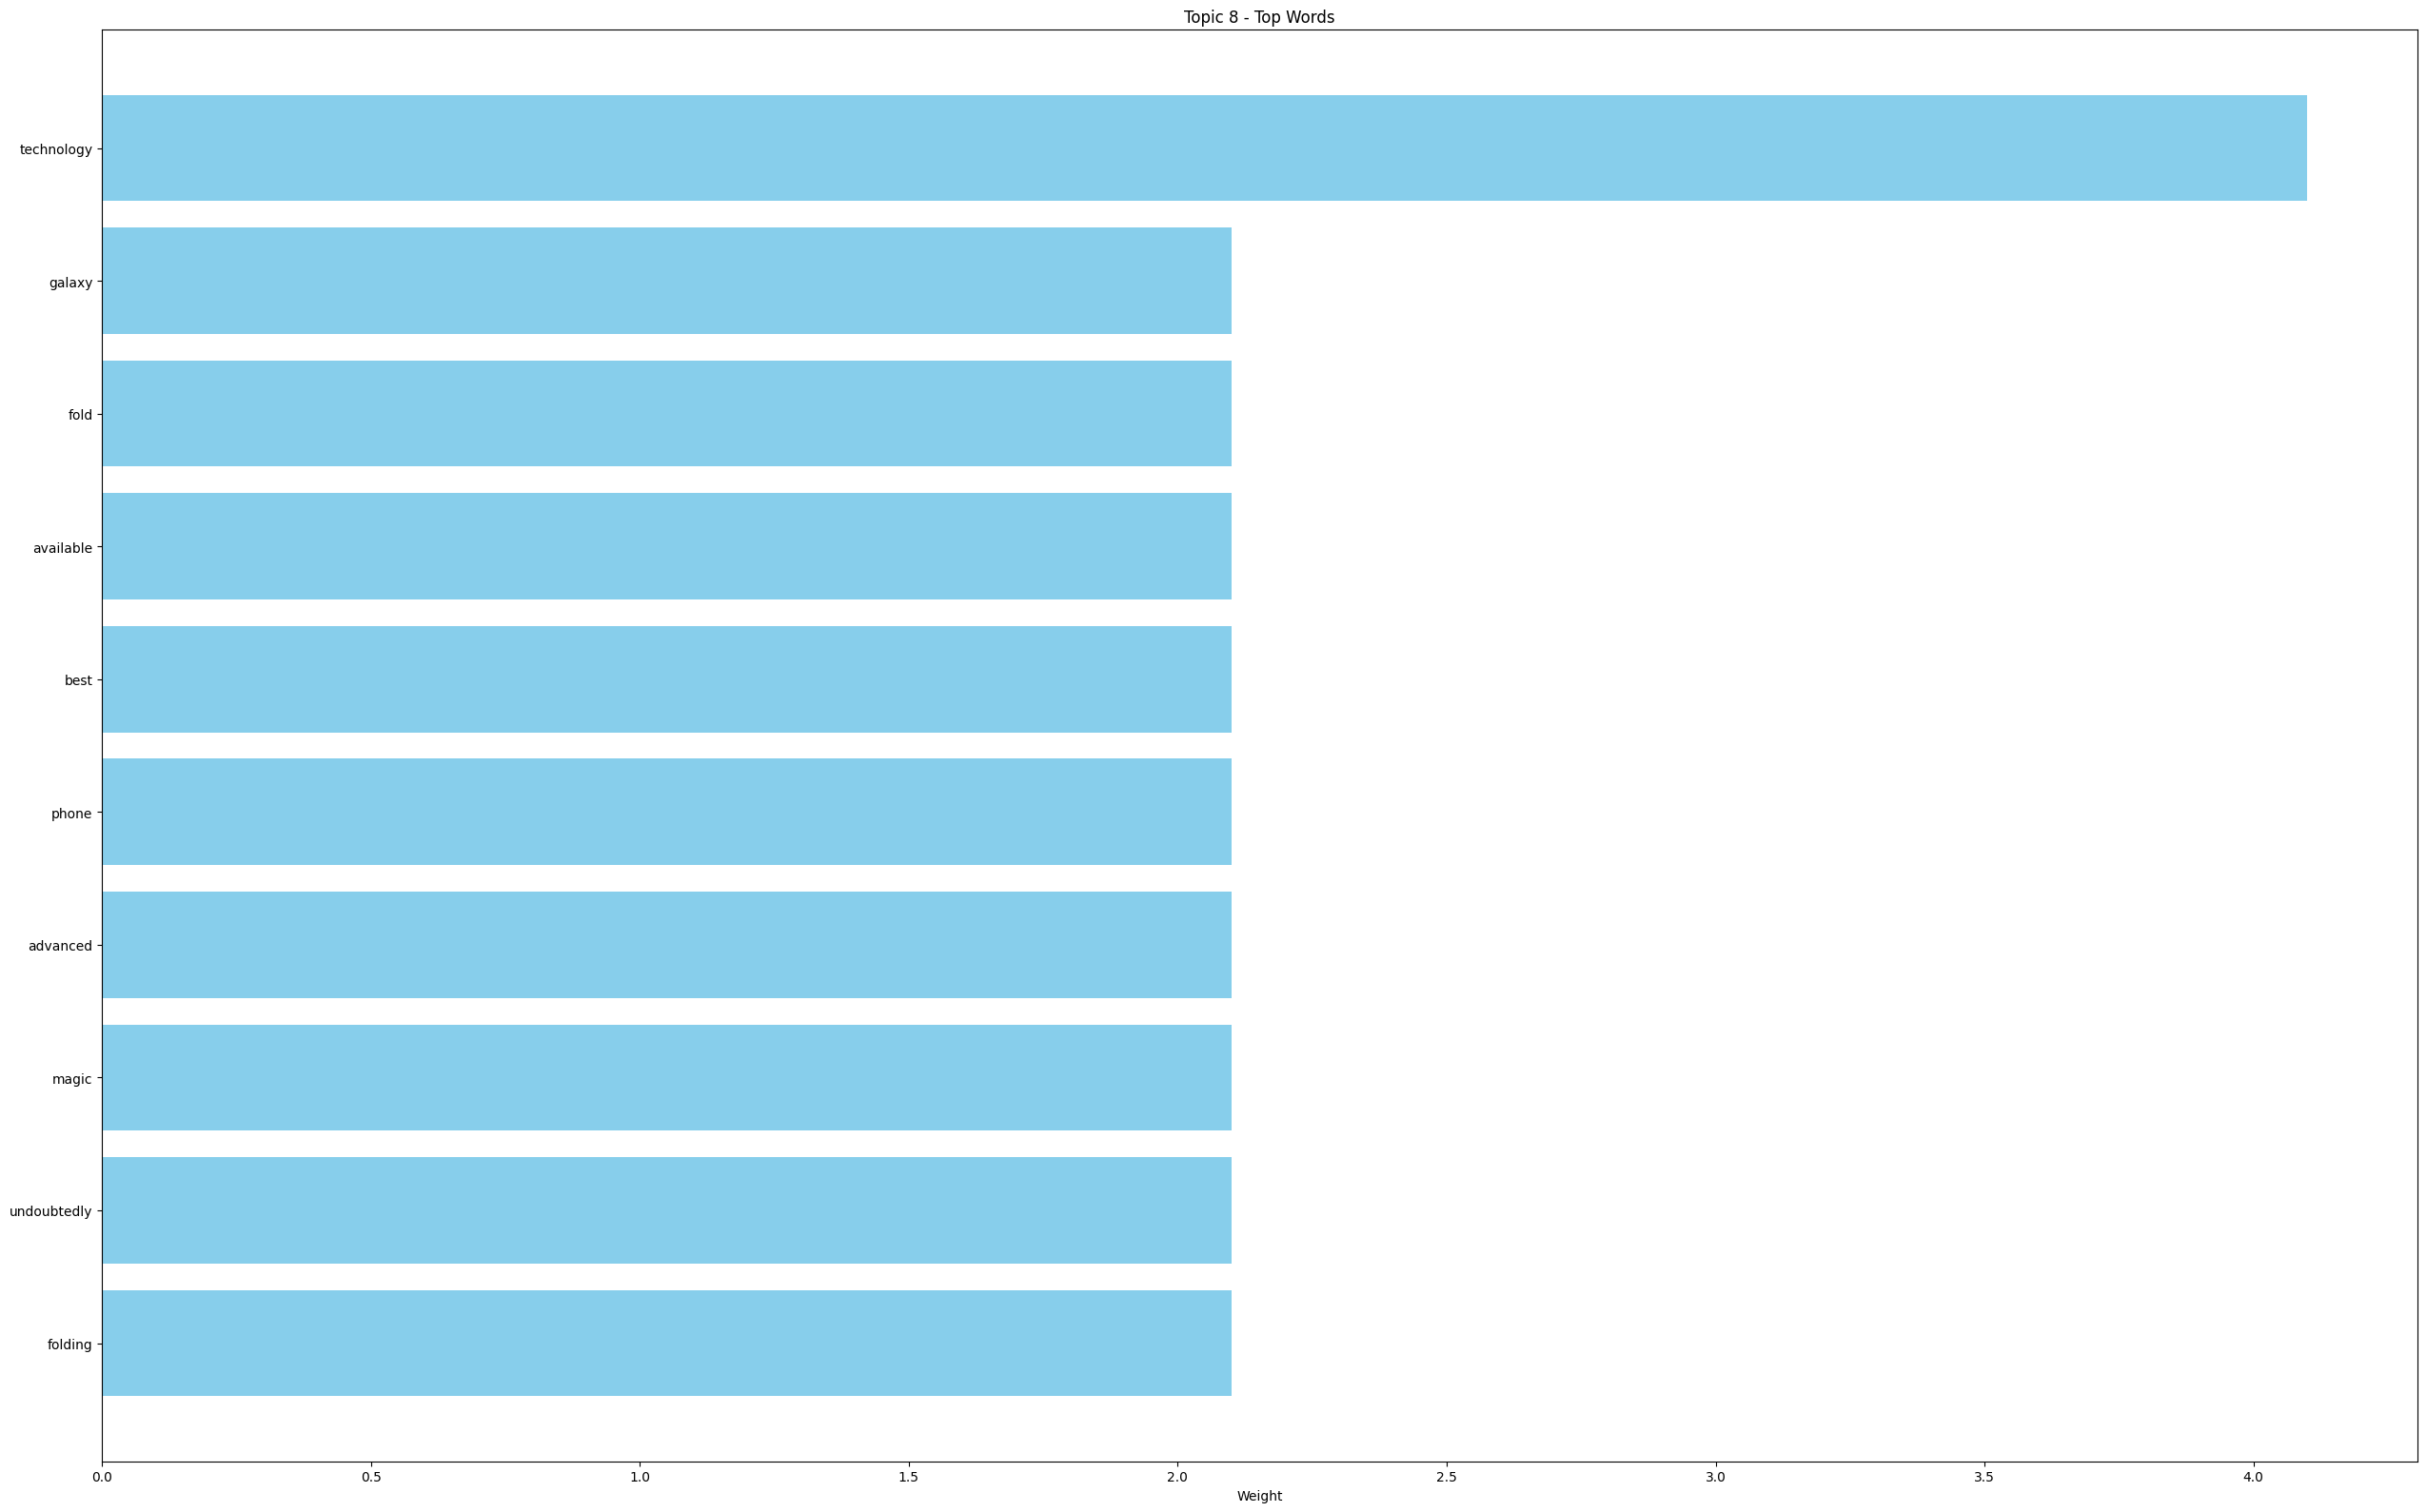

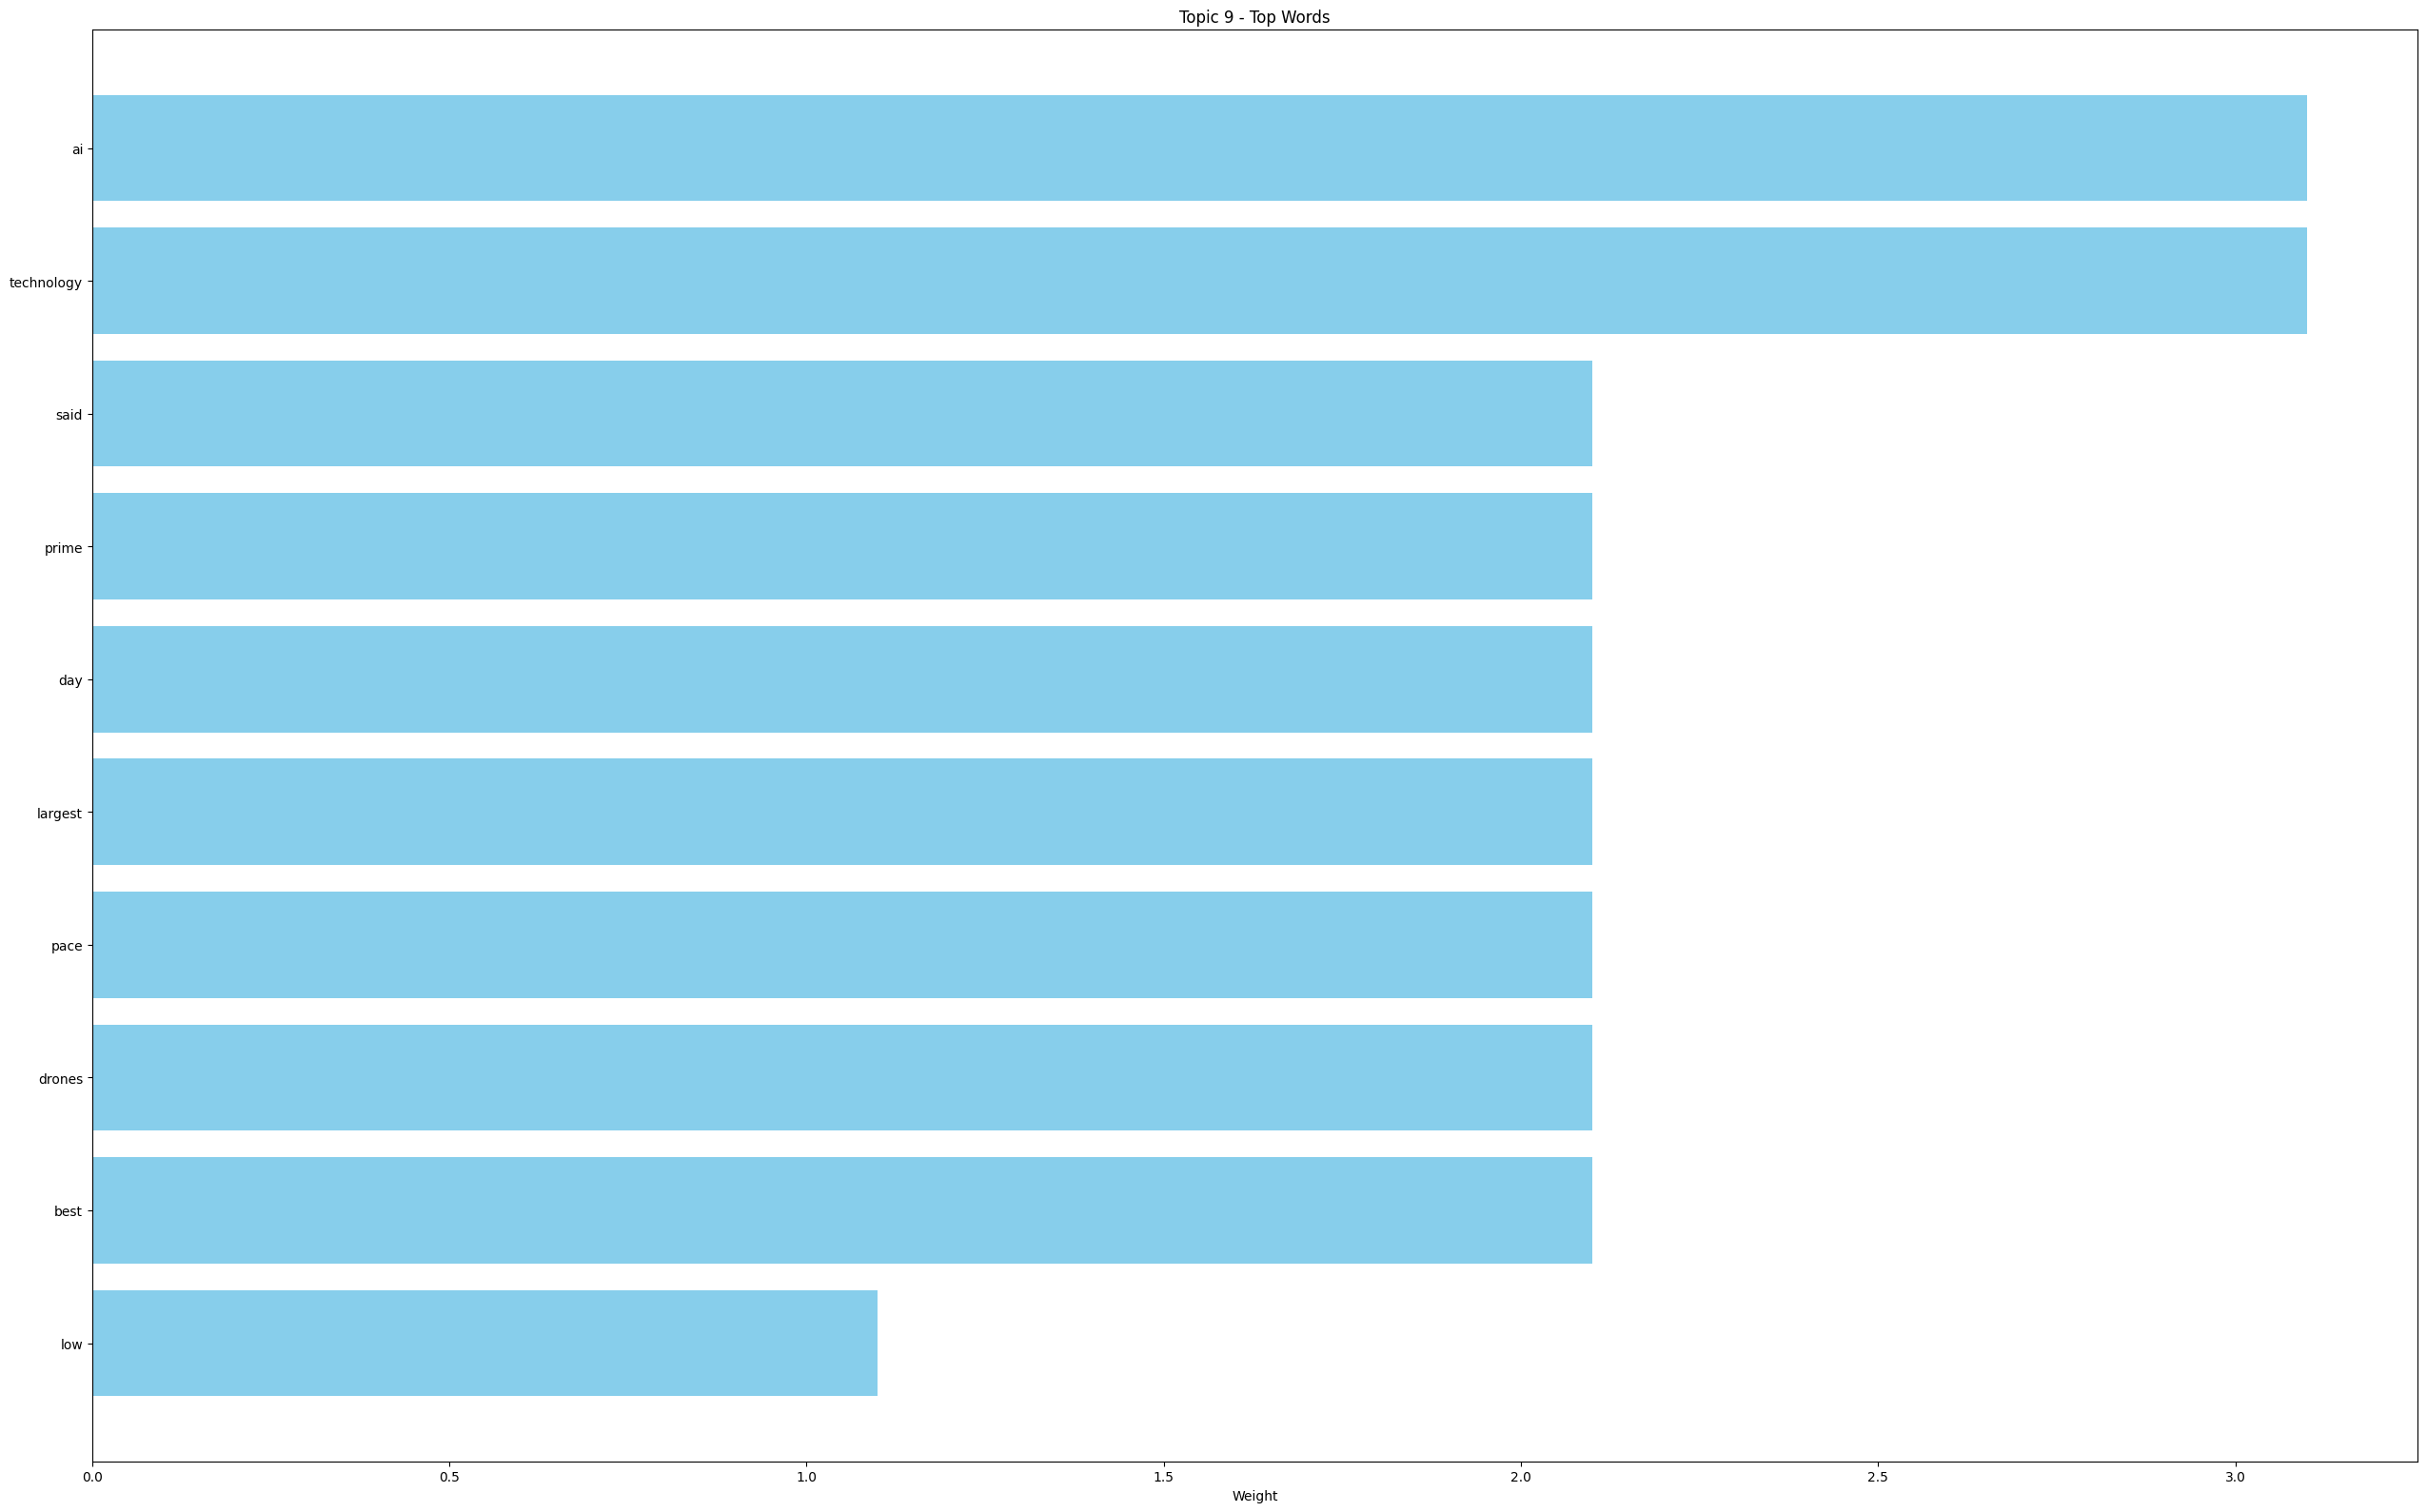

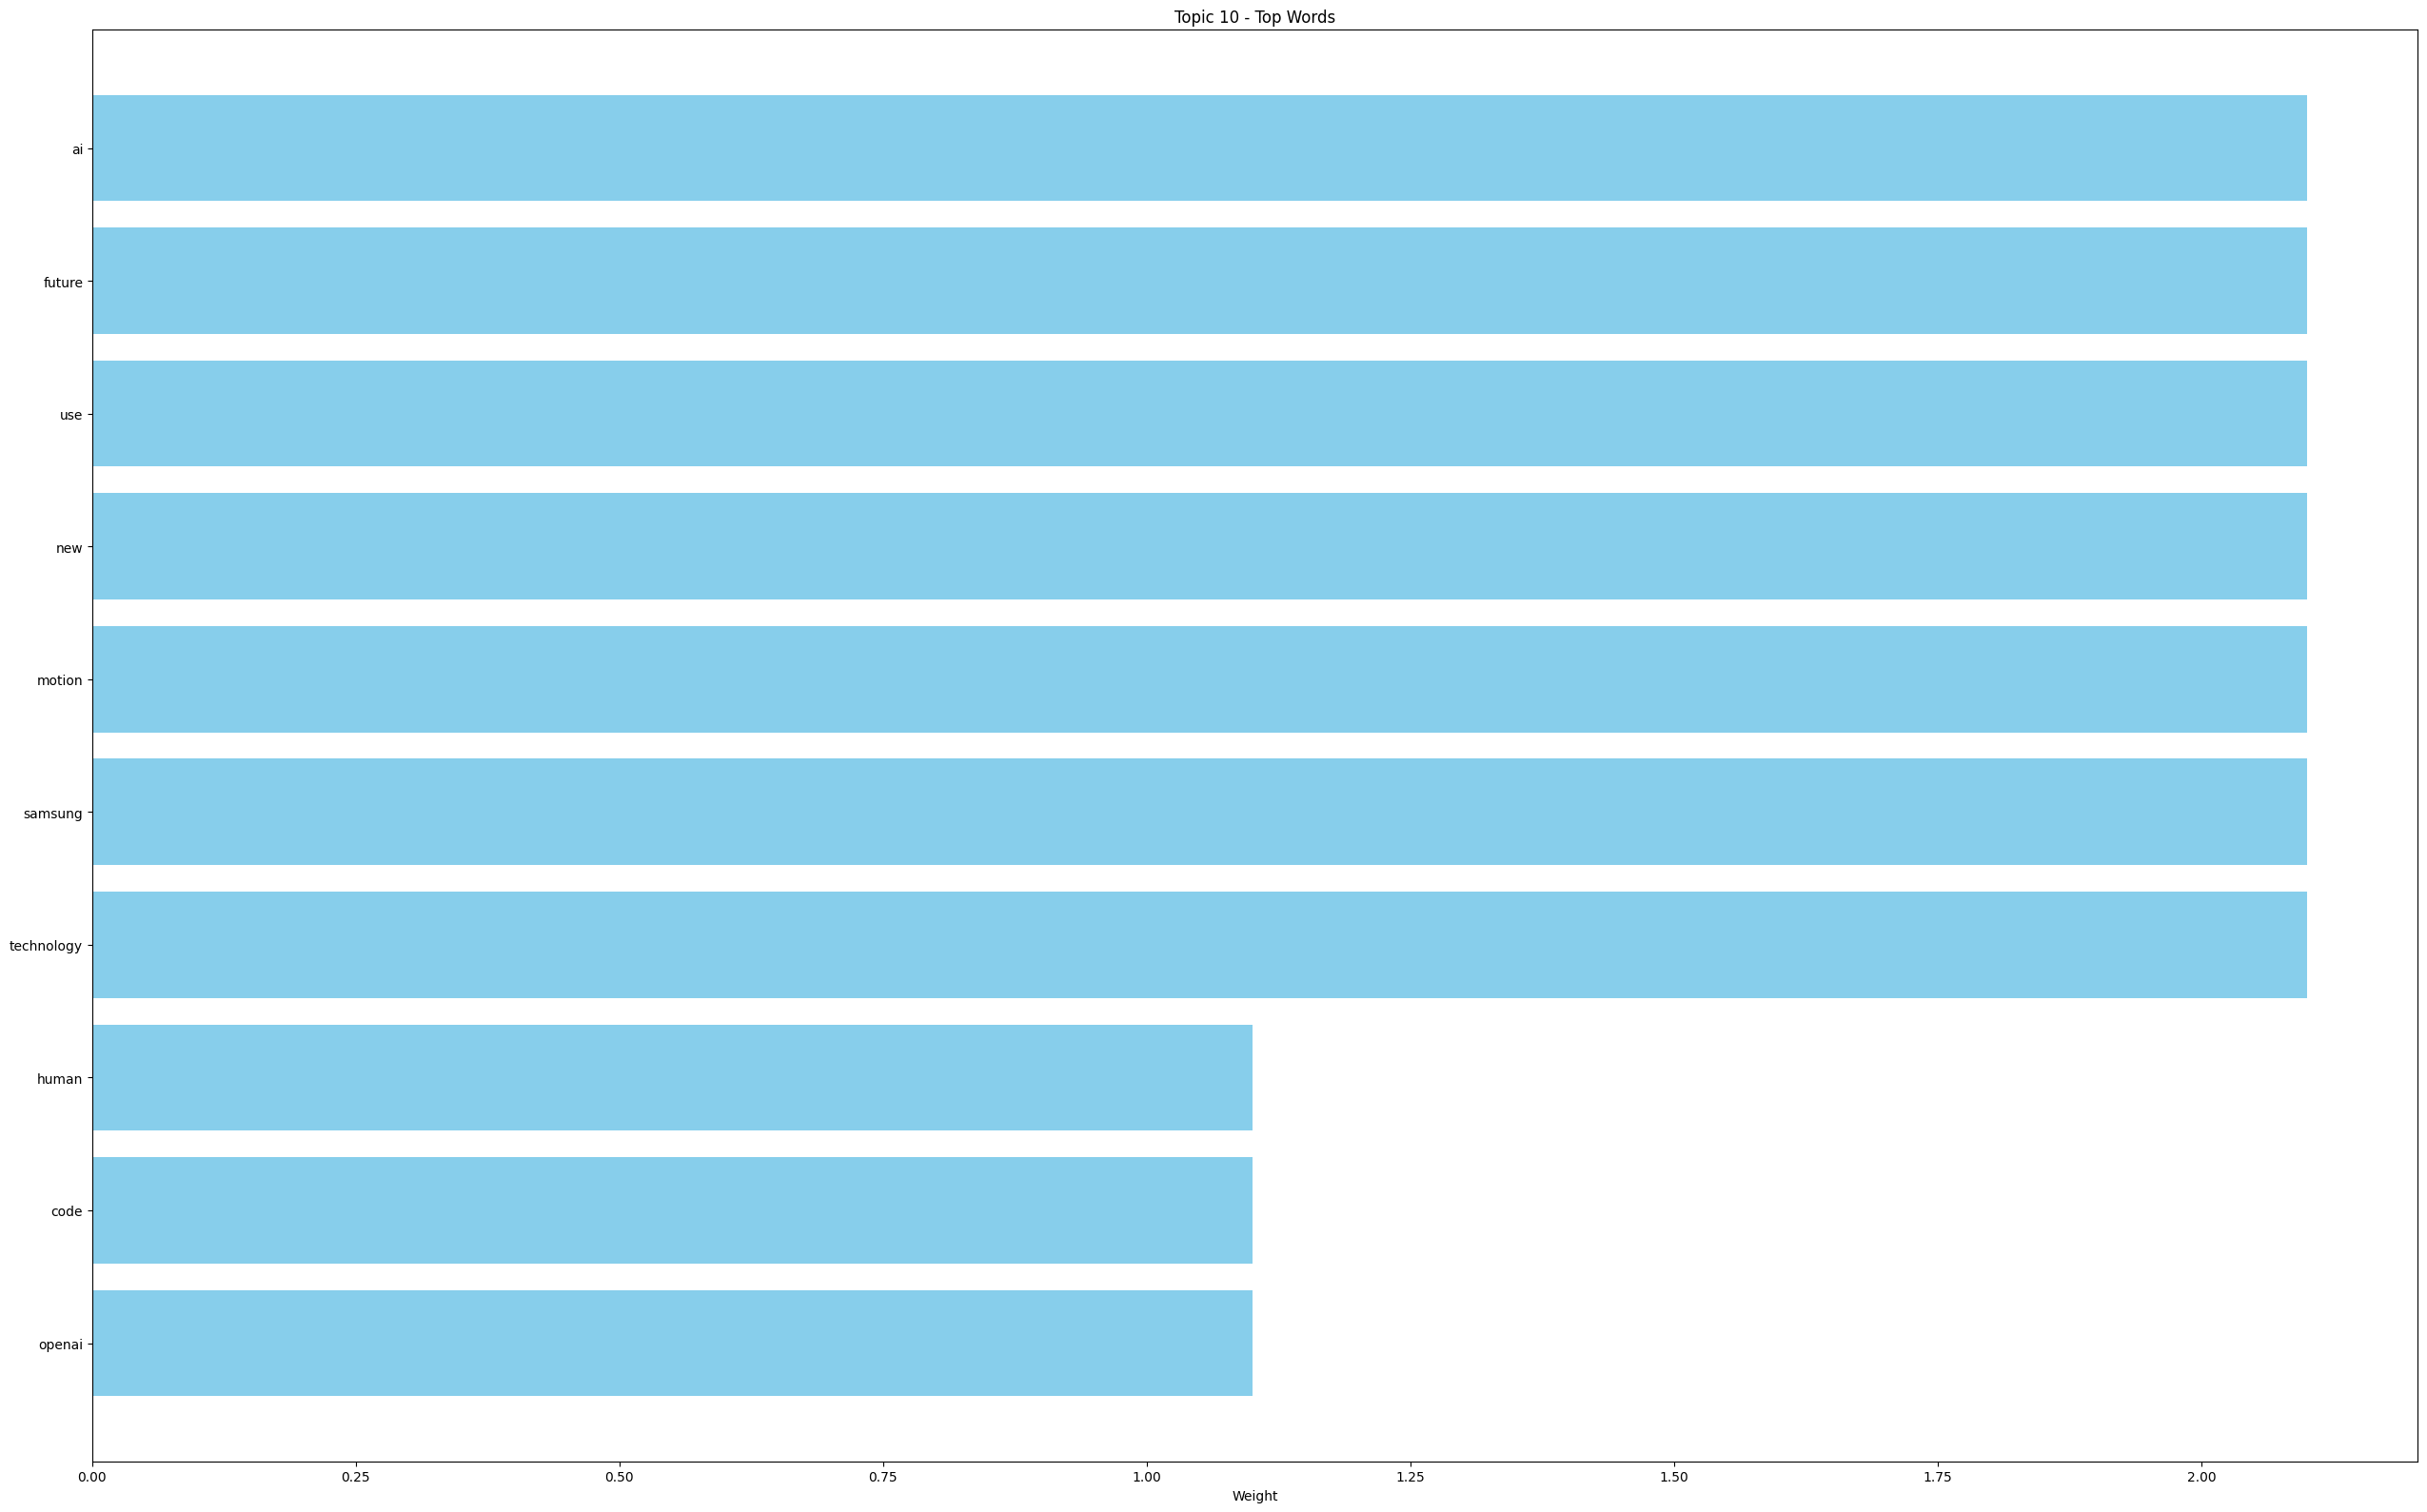

In [11]:
def plot_top_words_per_topic(lda_model, vectorizer, num_words=10):
    words = vectorizer.get_feature_names_out()
    topics = lda_model.components_
    
    for topic_idx, topic in enumerate(topics):
        # Get the top words for each topic
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        top_weights = topic[top_words_idx]
        
        # Plot the bar chart for the current topic
        plt.figure(figsize=(25.6, 16))
        plt.barh(top_words, top_weights, color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis for better readability
        plt.title(f'Topic {topic_idx + 1} - Top Words')
        plt.xlabel('Weight')
        plt.tight_layout()
        plt.show()

# Display the top words for each topic from the LDA model
plot_top_words_per_topic(lda_model, vectorizer)

### Delete Dataset once the work is done.

In [12]:
import os
os.remove('cleaned_news_data.csv')